<a href="https://colab.research.google.com/github/rijomj008-create/Ireland-Energy-Simulator/blob/main/Ireland_Energy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0) Setup (installs + folders)

In [2]:
# === Colab setup ===
!pip -q install entsoe-py meteostat eurostat

import os, pathlib
BASE = pathlib.Path(".").resolve()
for p in ["data/raw", "data/processed"]:
    (BASE / p).mkdir(parents=True, exist_ok=True)

print("Folders ready:", BASE / "data")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00
Folders ready: /content/data


1) ENTSO-E Transparency Platform (load, generation by type, day-ahead price)

In [3]:
!pip -q install entsoe-py pytz
from entsoe import EntsoePandasClient
import pandas as pd
import pytz
from datetime import datetime, timedelta


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [4]:
#Hidden in an environment variable
import os
os.environ["ENTSOE_API_KEY"] = "a03e0aab-b54c-466d-82ac-86da61ff0b53"
client = EntsoePandasClient(api_key=os.getenv("ENTSOE_API_KEY"))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Imports, client, time window

In [5]:
# (you already ran installs + set ENTROE_API_KEY + client)
import pandas as pd, pytz
from datetime import datetime, timedelta

# Time window
end_utc   = pd.Timestamp(datetime.now(), tz=pytz.UTC).floor("H")
start_utc = end_utc - timedelta(days=7)   # last 7 days
print(start_utc, "→", end_utc)


2025-10-18 14:00:00+00:00 → 2025-10-25 14:00:00+00:00


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

ENTSO-E — Total Load (robust normalizer) → save

In [6]:
raw = client.query_load('IE', start=start_utc, end=end_utc)

# normalize Series/DataFrame
if isinstance(raw, pd.Series):
    s = raw.copy()
else:
    s = raw.iloc[:, 0].copy()

s.index = pd.DatetimeIndex(s.index).tz_convert('UTC'); s.index.name = 'ts_utc'
df_load = s.to_frame('load_mw').reset_index()
df_load['ts_local'] = df_load['ts_utc'].dt.tz_convert('Europe/Dublin')

df_load.to_csv("data/processed/entsoe_load_ie_hourly.csv", index=False)
df_load.head(3)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,ts_utc,load_mw,ts_local
0,2025-10-18 14:00:00+00:00,4065.0,2025-10-18 15:00:00+01:00
1,2025-10-18 14:30:00+00:00,4062.0,2025-10-18 15:30:00+01:00
2,2025-10-18 15:00:00+00:00,4143.0,2025-10-18 16:00:00+01:00


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

ENTSO-E — Generation by type (wide → tidy) → save

In [7]:
import pandas as pd

# --- Step 3: Generation by type (auto-detect + safe melt) ---
g_raw = client.query_generation('IE', start=start_utc, end=end_utc, psr_type=None)

print("Returned object type:", type(g_raw))
print("Shape:", getattr(g_raw, "shape", None))

# If it's empty or None
if g_raw is None or len(g_raw) == 0:
    raise ValueError("No generation data returned. Try widening the date range or checking ENTSO-E availability.")

# If it’s a Series (older entsoe-py)
if isinstance(g_raw, pd.Series):
    g_raw = g_raw.to_frame()

# Handle multi-index columns (some ENTSO-E tables use 2-level headers)
if isinstance(g_raw.columns, pd.MultiIndex):
    g_raw.columns = ['_'.join([str(c) for c in col if c]) for col in g_raw.columns]

# Force tz-aware UTC index and convert to column
g_raw.index = pd.DatetimeIndex(g_raw.index).tz_convert('UTC')
g_raw = g_raw.reset_index()
# detect the datetime column (the one we just reset)
time_col = g_raw.columns[0]
g_raw = g_raw.rename(columns={time_col: "ts_utc"})
g_raw["ts_local"] = g_raw["ts_utc"].dt.tz_convert("Europe/Dublin")

print("Detected columns:", list(g_raw.columns)[:10])

# Identify value columns (everything except timestamps)
id_cols = ["ts_utc", "ts_local"]
val_cols = [c for c in g_raw.columns if c not in id_cols]

if not val_cols:
    raise ValueError(f"No generation value columns found. Columns={list(g_raw.columns)}")

gen_tidy = (
    g_raw.melt(id_vars=id_cols, value_vars=val_cols,
               var_name="gen_type", value_name="generation_mw")
          .dropna(subset=["generation_mw"])
)

out_path = "/content/data/processed/entsoe_generation_ie_hourly_tidy.csv"
gen_tidy.to_csv(out_path, index=False)
print(f"\n✅ Saved → {out_path}  |  rows={len(gen_tidy)}")
display(gen_tidy.head(5))





/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Returned object type: <class 'pandas.core.frame.DataFrame'>
Shape: (332, 17)
Detected columns: ['ts_utc', 'Fossil Gas_Actual Aggregated', 'Fossil Gas_Actual Consumption', 'Fossil Hard coal_Actual Aggregated', 'Fossil Hard coal_Actual Consumption', 'Fossil Oil_Actual Aggregated', 'Fossil Oil_Actual Consumption', 'Fossil Peat_Actual Aggregated', 'Fossil Peat_Actual Consumption', 'Hydro Pumped Storage_Actual Aggregated']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


✅ Saved → /content/data/processed/entsoe_generation_ie_hourly_tidy.csv  |  rows=5644


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,ts_utc,ts_local,gen_type,generation_mw
0,2025-10-18 14:00:00+00:00,2025-10-18 15:00:00+01:00,Fossil Gas_Actual Aggregated,577.96
1,2025-10-18 14:30:00+00:00,2025-10-18 15:30:00+01:00,Fossil Gas_Actual Aggregated,614.66
2,2025-10-18 15:00:00+00:00,2025-10-18 16:00:00+01:00,Fossil Gas_Actual Aggregated,623.40
3,2025-10-18 15:30:00+00:00,2025-10-18 16:30:00+01:00,Fossil Gas_Actual Aggregated,549.68
4,2025-10-18 16:00:00+00:00,2025-10-18 17:00:00+01:00,Fossil Gas_Actual Aggregated,515.15


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

SEMOpx daily CSVs → hourly price (EUR/MWh) → save

In [9]:
import re, pathlib
BASE = pathlib.Path(".").resolve()
RAW  = BASE / "data" / "raw"
PROC = BASE / "data" / "processed"
RAW.mkdir(parents=True, exist_ok=True); PROC.mkdir(parents=True, exist_ok=True)

def _read_semopx_any(p):
    import pandas as pd
    try: return pd.read_csv(p, engine="python", sep=None)
    except: pass
    for sep in [",",";","\t","|"]:
        try: return pd.read_csv(p, sep=sep)
        except: continue
    return pd.read_csv(p, engine="python", sep=None, encoding="latin-1")

def _find_col(cols, *pats):
    norm = {c: re.sub(r"\s+"," ",str(c)).strip().lower() for c in cols}
    for pat in pats:
        rx = re.compile(pat, re.I)
        for raw,nm in norm.items():
            if rx.search(nm): return raw
    return None

def parse_semopx_csv(path: pathlib.Path):
    import pandas as pd
    df = _read_semopx_any(path)
    if df.empty: raise ValueError("empty file")

    cols = list(df.columns)
    col_date  = _find_col(cols, r"^date$", r"^delivery\s*date$", r"^trade\s*date$")
    col_time  = _find_col(cols, r"^time$", r"^delivery\s*(hour|time|period)$", r"^hour$")
    col_price = (_find_col(cols, r"^eur$") or
                 _find_col(cols, r"eur\s*/\s*mwh") or
                 _find_col(cols, r"\bmcp\b") or
                 _find_col(cols, r"price.*eur.*mwh") or
                 _find_col(cols, r"^price$"))
    if not (col_date and col_time and col_price):
        raise ValueError(f"Missing columns in {path.name}: {list(df.columns)}")

    # build CET timestamp
    t = df[col_time].astype(str).str.strip().str.replace(r"[^\d:]", ":", regex=True)
    t = t.apply(lambda s: s if ":" in s else f"{s}:00")
    ts_cet = pd.to_datetime(df[col_date].astype(str).str.strip()+" "+t.str.zfill(5),
                            errors="coerce", format="%Y-%m-%d %H:%M")

    # price numeric
    price = (df[col_price].astype(str)
                     .str.replace(r"[€\s]", "", regex=True)
                     .str.replace(",", ".", regex=False))
    price = pd.to_numeric(price, errors="coerce")

    out = pd.DataFrame({"ts_cet": ts_cet, "price_eur_per_mwh": price}).dropna()
    out["ts_utc"]   = out["ts_cet"].dt.tz_localize("CET", nonexistent="shift_forward").dt.tz_convert("UTC")
    out["ts_local"] = out["ts_utc"].dt.tz_convert("Europe/Dublin")

    hourly = (out.set_index("ts_utc")[["price_eur_per_mwh"]]
                .resample("1H", label="right", closed="right").mean()
                .dropna().reset_index())
    hourly["ts_local"] = hourly["ts_utc"].dt.tz_convert("Europe/Dublin")
    return hourly[["ts_utc","ts_local","price_eur_per_mwh"]].sort_values("ts_utc")

# combine all daily files
csvs = sorted(RAW.glob("*.csv"))
pieces = []
for f in csvs:
    try:
        df = parse_semopx_csv(f); df["source_file"] = f.name; pieces.append(df)
        print("OK →", f.name, "| rows:", len(df))
    except Exception as e:
        print("Skip →", f.name, "|", e)

assert pieces, "No SEMOpx files parsed. Check that your daily CSVs are in data/raw/."
price_all = (pd.concat(pieces, ignore_index=True)
             .drop_duplicates(subset=["ts_utc"])
             .sort_values("ts_utc"))
price_all.to_csv(PROC / "entsoe_price_ie_hourly.csv", index=False)
price_all.head(3)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

OK → Day-Ahead 01-10-2025.csv | rows: 25
OK → Day-Ahead 02-10-2025.csv | rows: 25
OK → Day-Ahead 03-10-2025.csv | rows: 25
OK → Day-Ahead 04-10-2025.csv | rows: 25
OK → Day-Ahead 05-10-2025.csv | rows: 25
OK → Day-Ahead 06-10-2025.csv | rows: 25
OK → Day-Ahead 07-10-2025.csv | rows: 25


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,ts_utc,ts_local,price_eur_per_mwh,source_file
0,2025-09-30 21:00:00+00:00,2025-09-30 22:00:00+01:00,87.790,Day-Ahead 01-10-2025.csv
1,2025-09-30 22:00:00+00:00,2025-09-30 23:00:00+01:00,81.390,Day-Ahead 01-10-2025.csv
2,2025-09-30 23:00:00+00:00,2025-10-01 00:00:00+01:00,76.475,Day-Ahead 01-10-2025.csv


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Build the first fact tables + a joined “mart”

In [11]:
import pandas as pd

# --- Reload sources (if needed) ---
load  = pd.read_csv("data/processed/entsoe_load_ie_hourly.csv", parse_dates=["ts_utc"])
gen   = pd.read_csv("data/processed/entsoe_generation_ie_hourly_tidy.csv", parse_dates=["ts_utc"])
price = pd.read_csv("data/processed/entsoe_price_ie_hourly.csv", parse_dates=["ts_utc"])

# --- Hourly load ---
fact_load_actual = (load.set_index("ts_utc")[["load_mw"]]
                       .resample("1H", label="right", closed="right").mean()
                       .reset_index())
fact_load_actual.to_csv("data/processed/fact_load_actual.csv", index=False)

# --- Generation by type → hourly mean (keep tidy) ---
fact_generation_actual = (gen.groupby([pd.Grouper(key="ts_utc", freq="1H", label="right", closed="right"),
                                       "gen_type"])
                            ["generation_mw"].mean().reset_index())
fact_generation_actual.to_csv("data/processed/fact_generation_actual.csv", index=False)

# --- Market price ---
fact_market_price = price[["ts_utc","price_eur_per_mwh"]].copy()
fact_market_price.to_csv("data/processed/fact_market_price.csv", index=False)

# =========================
# Robust renewable split
# =========================
# 1) Normalize gen_type to lower-case for matching
gen_ci = gen.copy()
gen_ci["gen_type_norm"] = gen_ci["gen_type"].astype(str).str.lower().str.strip()

# 2) Define renewable set (lower-case variants commonly seen from ENTSO-E)
renewable_set = {
    "wind onshore", "wind offshore", "wind", "solar", "photovoltaic",
    "hydro", "hydro run-of-river and poundage", "hydro water reservoir",
    "run of river", "biomass", "waste", "geothermal", "other renewable"
}

# 3) Flag renewables (default False if not in set)
gen_ci["is_ren"] = gen_ci["gen_type_norm"].isin(renewable_set)

# 4) Hourly average by renewable flag
ren_split = (gen_ci.groupby([pd.Grouper(key="ts_utc", freq="1H", label="right", closed="right"), "is_ren"])
                    ["generation_mw"].mean().unstack())

# Ensure both columns (True/False) exist
for col in [True, False]:
    if col not in ren_split.columns:
        ren_split[col] = 0.0

ren_split = (ren_split
             .rename(columns={True:"renewable_mw", False:"non_renewable_mw"})
             .reset_index())

# 5) Renewable share (%)
den = (ren_split["renewable_mw"] + ren_split["non_renewable_mw"]).replace(0, pd.NA)
ren_split["renewable_share_pct"] = (100 * ren_split["renewable_mw"] / den)

# 6) System total generation (hourly)
gen_total = (gen.groupby(pd.Grouper(key="ts_utc", freq="1H", label="right", closed="right"))
               ["generation_mw"].mean().reset_index(name="total_generation_mw"))

# =========================
# Build mart
# =========================
mart = (fact_load_actual
        .merge(gen_total, on="ts_utc", how="left")
        .merge(ren_split[["ts_utc","renewable_share_pct"]], on="ts_utc", how="left")
        .merge(fact_market_price, on="ts_utc", how="left")
        ).sort_values("ts_utc")

mart.to_csv("data/processed/mart_ie_hourly_system_kpis.csv", index=False)
print("Saved → data/processed/mart_ie_hourly_system_kpis.csv")
mart.tail(3)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Saved → data/processed/mart_ie_hourly_system_kpis.csv


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,ts_utc,load_mw,total_generation_mw,renewable_share_pct,price_eur_per_mwh
166,2025-10-25 12:00:00+00:00,3883.5,133.485176,0.0,NaN
167,2025-10-25 13:00:00+00:00,3844.5,132.765000,0.0,NaN
168,2025-10-25 14:00:00+00:00,3836.0,137.235118,0.0,NaN


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Fetch Meteostat hourly for key Irish locations → combine → save

In [3]:
# === Meteostat hourly weather for Ireland (UTC) ===
# Output: /content/data/processed/meteostat_ie_hourly.csv

!pip -q install meteostat

import pandas as pd, pytz
from datetime import datetime, timedelta
from meteostat import Point, Hourly
from pathlib import Path

# Use the same window you used for ENTSO-E; create if missing
try:
    start_utc, end_utc
except NameError:
    end_utc   = pd.Timestamp(datetime.now(), tz=pytz.UTC).floor("h")
    start_utc = end_utc - timedelta(days=7)

# -> Meteostat wants **naive** datetimes (assumed UTC)
start_naive = pd.Timestamp(start_utc).tz_convert("UTC").tz_localize(None)
end_naive   = pd.Timestamp(end_utc).tz_convert("UTC").tz_localize(None)

stations = {
    "dublin":  Point(53.427, -6.243, 85),
    "shannon": Point(52.701, -8.924, 14),
    "cork":    Point(51.841, -8.491, 151),
    "donegal": Point(54.654, -8.111, 9),
}

def fetch_hourly(point: Point, start_naive, end_naive) -> pd.DataFrame:
    df = Hourly(point, start_naive, end_naive).fetch()
    df = df.reset_index().rename(columns={"time": "ts"})
    # Meteostat returns UTC but *naive* → make it tz-aware UTC
    ts_utc = pd.to_datetime(df["ts"], utc=True)
    df = df.drop(columns=["ts"])
    df.insert(0, "ts_utc", ts_utc)

    keep = ["ts_utc","t","rhum","wspd","wpgt","wdir","prcp","pres","tsun"]
    existing = [c for c in keep if c in df.columns]
    return df[existing].copy()

pieces = []
for name, pt in stations.items():
    try:
        df = fetch_hourly(pt, start_naive, end_naive)
        # suffix per-station columns
        df = df.rename(columns={c: f"{c}_{name}" for c in df.columns if c != "ts_utc"})
        pieces.append(df)
        print(f"OK  {name}: rows={len(df)} cols={len(df.columns)}")
    except Exception as e:
        print(f"Skip {name}: {e}")

assert pieces, "No Meteostat data returned. If this persists, widen the time range."

# Join all stations on timestamp
from functools import reduce
wide = reduce(lambda L,R: pd.merge(L,R,on="ts_utc",how="outer"), pieces).sort_values("ts_utc")

def mean_across(prefix):
    cols = [c for c in wide.columns if c.startswith(prefix+"_")]
    if not cols:
        return pd.Series([pd.NA]*len(wide), index=wide.index)
    return wide[cols].astype("float64").mean(axis=1)

out = pd.DataFrame({
    "ts_utc":           wide["ts_utc"],
    "wind_speed_mps":   mean_across("wspd"),
    "wind_gust_mps":    mean_across("wpgt"),
    "wind_dir_deg":     mean_across("wdir"),
    "temp_c":           mean_across("t"),
    "rel_humidity_pct": mean_across("rhum"),
    "precip_mm":        mean_across("prcp"),
    "pressure_hpa":     mean_across("pres"),
    "sunshine_min":     mean_across("tsun"),
})
out["sunshine_fraction"] = (out["sunshine_min"] / 60.0).clip(0,1)
out["ts_local"] = out["ts_utc"].dt.tz_convert("Europe/Dublin")

PROC = Path("/content/data/processed"); PROC.mkdir(parents=True, exist_ok=True)
meteopath = PROC / "meteostat_ie_hourly.csv"
out.to_csv(meteopath, index=False)
print(f"Saved → {meteopath}  | rows={len(out)}")
display(out.head(3))


OK  dublin: rows=169 cols=8
OK  shannon: rows=169 cols=8


OK  cork: rows=169 cols=8
Skip donegal: 'ts'
Saved → /content/data/processed/meteostat_ie_hourly.csv  | rows=169


,ts_utc,wind_speed_mps,wind_gust_mps,wind_dir_deg,temp_c,rel_humidity_pct,precip_mm,pressure_hpa,sunshine_min,sunshine_fraction,ts_local
0,2025-10-18 15:00:00+00:00,31.333333,40.400000,140.000000,<NA>,90.666667,0.366667,1010.966667,0.0,0.0,2025-10-18 16:00:00+01:00
1,2025-10-18 16:00:00+00:00,33.333333,45.166667,136.666667,<NA>,90.333333,0.300000,1009.733333,0.0,0.0,2025-10-18 17:00:00+01:00
2,2025-10-18 17:00:00+00:00,35.666667,40.333333,140.000000,<NA>,87.666667,0.300000,1008.600000,0.0,0.0,2025-10-18 18:00:00+01:00


Re-join weather into your mart

In [4]:
import pandas as pd
from pathlib import Path

PROC  = Path("/content/data/processed")
mart  = pd.read_csv(PROC / "mart_ie_hourly_system_kpis.csv", parse_dates=["ts_utc"])
meteo = pd.read_csv(PROC / "meteostat_ie_hourly.csv", parse_dates=["ts_utc"])

mart2 = (mart.merge(meteo[["ts_utc","wind_speed_mps","sunshine_fraction","temp_c","precip_mm"]],
                    on="ts_utc", how="left")
              .sort_values("ts_utc"))
mart2.to_csv(PROC / "mart_ie_hourly_system_kpis.csv", index=False)
print("Updated mart with weather →", (PROC / "mart_ie_hourly_system_kpis.csv").as_posix())
display(mart2.tail(3))


Updated mart with weather → /content/data/processed/mart_ie_hourly_system_kpis.csv


,ts_utc,load_mw,total_generation_mw,renewable_share_pct,price_eur_per_mwh,wind_speed_mps,sunshine_fraction,temp_c,precip_mm
166,2025-10-25 12:00:00+00:00,3883.5,133.485176,0.0,NaN,28.400000,0.633333,NaN,0.000000
167,2025-10-25 13:00:00+00:00,3844.5,132.765000,0.0,NaN,29.633333,0.566667,NaN,0.000000
168,2025-10-25 14:00:00+00:00,3836.0,137.235118,0.0,NaN,29.633333,0.466667,NaN,0.066667


Fix: Align and re-merge prices precisely

In [7]:
import pandas as pd
from pathlib import Path

# ---- paths
PROC = Path("/content/data/processed") if Path("/content/data/processed").exists() else Path("data/processed")

# ---- load sources
load  = pd.read_csv(PROC / "entsoe_load_ie_hourly.csv", parse_dates=["ts_utc"])
gen   = pd.read_csv(PROC / "entsoe_generation_ie_hourly_tidy.csv", parse_dates=["ts_utc"])
price = pd.read_csv(PROC / "entsoe_price_ie_hourly.csv", parse_dates=["ts_utc"])
meteo = pd.read_csv(PROC / "meteostat_ie_hourly.csv", parse_dates=["ts_utc"]) if (PROC / "meteostat_ie_hourly.csv").exists() else None

# ---- align timestamps to exact hourly UTC everywhere
for df in [load, gen, price] + ([meteo] if meteo is not None else []):
    df["ts_utc"] = pd.to_datetime(df["ts_utc"]).dt.floor("h")

# ---- fact: load
fact_load_actual = (load.set_index("ts_utc")[["load_mw"]]
                      .resample("1h").mean()
                      .reset_index())
fact_load_actual.to_csv(PROC / "fact_load_actual.csv", index=False)

# ---- fact: generation by type (hourly mean; already tidy)
fact_generation_actual = (gen.groupby([pd.Grouper(key="ts_utc", freq="1h"), "gen_type"])
                            ["generation_mw"].mean().reset_index())
fact_generation_actual.to_csv(PROC / "fact_generation_actual.csv", index=False)

# ---- total generation (sum across types per hour)
gen_total = (fact_generation_actual.groupby("ts_utc")["generation_mw"]
               .sum().reset_index(name="total_generation_mw"))

# ---- robust renewable split
gen_ci = fact_generation_actual.copy()
gen_ci["gen_type_norm"] = gen_ci["gen_type"].astype(str).str.lower().str.strip()

renewable_set = {
    "wind", "wind onshore", "wind offshore",
    "solar", "photovoltaic",
    "hydro", "hydro run-of-river and poundage", "hydro water reservoir", "run of river",
    "biomass", "waste", "geothermal", "other renewable"
}
gen_ci["is_ren"] = gen_ci["gen_type_norm"].isin(renewable_set)

# Pivot to columns by is_ren, but handle any label types (True/'True'/1/etc.)
grp = gen_ci.groupby([pd.Grouper(key="ts_utc", freq="1h"), "is_ren"])["generation_mw"].sum().unstack()

def find_col_like(df_cols, candidates):
    for cand in candidates:
        if cand in df_cols:
            return cand
    return None

renew_col   = find_col_like(grp.columns, [True, 'True', 1, '1', 'true'])
nonrenew_col= find_col_like(grp.columns, [False,'False',0,'0','false'])

renew_ser   = grp[renew_col]    if renew_col    is not None else pd.Series(0.0, index=grp.index)
nonrenew_ser= grp[nonrenew_col] if nonrenew_col is not None else pd.Series(0.0, index=grp.index)

ren_split = (pd.DataFrame({
                "ts_utc": grp.index,
                "renewable_mw": renew_ser.fillna(0.0).values,
                "non_renewable_mw": nonrenew_ser.fillna(0.0).values
            })
            .sort_values("ts_utc")
            .reset_index(drop=True))

den = (ren_split["renewable_mw"] + ren_split["non_renewable_mw"]).replace(0, pd.NA)
ren_split["renewable_share_pct"] = 100 * ren_split["renewable_mw"] / den

# ---- fact: market price
fact_market_price = price[["ts_utc","price_eur_per_mwh"]].dropna()
fact_market_price.to_csv(PROC / "fact_market_price.csv", index=False)

# ---- build mart
mart = (fact_load_actual
        .merge(gen_total, on="ts_utc", how="left")
        .merge(ren_split[["ts_utc","renewable_share_pct"]], on="ts_utc", how="left")
        .merge(fact_market_price, on="ts_utc", how="left"))

if meteo is not None:
    mart = mart.merge(
        meteo[["ts_utc","wind_speed_mps","sunshine_fraction","temp_c","precip_mm"]],
        on="ts_utc", how="left"
    )

mart = mart.sort_values("ts_utc")
mart.to_csv(PROC / "mart_ie_hourly_system_kpis.csv", index=False)

print("✅ Rebuilt mart successfully.")
print("Saved →", (PROC / "mart_ie_hourly_system_kpis.csv").as_posix())
print("Head:")
display(mart.head(5))
print("\nNull counts:")
display(mart.isna().sum())


✅ Rebuilt mart successfully.
Saved → /content/data/processed/mart_ie_hourly_system_kpis.csv
Head:


,ts_utc,load_mw,total_generation_mw,renewable_share_pct,price_eur_per_mwh,wind_speed_mps,sunshine_fraction,temp_c,precip_mm
0,2025-10-18 14:00:00+00:00,4063.5,3584.910,0.0,NaN,NaN,NaN,NaN,NaN
1,2025-10-18 15:00:00+00:00,4177.5,3861.680,0.0,NaN,31.333333,0.0,NaN,0.366667
2,2025-10-18 16:00:00+00:00,4354.0,4077.390,0.0,NaN,33.333333,0.0,NaN,0.300000
3,2025-10-18 17:00:00+00:00,4446.0,4204.745,0.0,NaN,35.666667,0.0,NaN,0.300000
4,2025-10-18 18:00:00+00:00,4421.0,4178.765,0.0,NaN,34.666667,0.0,NaN,0.300000



Null counts:


,0
ts_utc,0
load_mw,3
total_generation_mw,2
renewable_share_pct,2
price_eur_per_mwh,168
wind_speed_mps,1
sunshine_fraction,1
temp_c,168
precip_mm,1


In [8]:
# 0) Clean the old raw folder so we don't mix weeks
from pathlib import Path, PurePosixPath
RAW  = Path("/content/data/raw"); RAW.mkdir(parents=True, exist_ok=True)
for f in RAW.glob("*.csv"): f.unlink()
print("Cleared:", RAW)


Cleared: /content/data/raw


Parse & combine the daily CSVs → hourly price

In [9]:
import re, pathlib, pandas as pd
BASE = pathlib.Path("/content"); RAW = BASE/"data"/"raw"; PROC = BASE/"data"/"processed"

def _read_any(p):
    try: return pd.read_csv(p, engine="python", sep=None)
    except:
        for s in [",",";","\t","|"]:
            try: return pd.read_csv(p, sep=s)
            except: pass
    return pd.read_csv(p, engine="python", sep=None, encoding="latin-1")

def _find_col(cols, *pats):
    norm = {c: re.sub(r"\s+"," ",str(c)).strip().lower() for c in cols}
    import re as _re
    for pat in pats:
        rx = _re.compile(pat, _re.I)
        for raw,nm in norm.items():
            if rx.search(nm): return raw
    return None

def parse_semopx_csv(path: pathlib.Path) -> pd.DataFrame:
    df = _read_any(path)
    col_date  = _find_col(df.columns, r"^date$", r"^delivery\s*date$")
    col_time  = _find_col(df.columns, r"^time$", r"^delivery\s*(hour|time|period)$", r"^hour$")
    col_price = (_find_col(df.columns, r"^eur$") or
                 _find_col(df.columns, r"eur\s*/\s*mwh") or
                 _find_col(df.columns, r"\bmcp\b") or
                 _find_col(df.columns, r"price.*eur.*mwh") or
                 _find_col(df.columns, r"^price$"))
    if not (col_date and col_time and col_price):
        raise ValueError(f"Missing columns in {path.name}: {list(df.columns)}")

    t = df[col_time].astype(str).str.strip().str.replace(r"[^\d:]", ":", regex=True)
    t = t.apply(lambda s: s if ":" in s else f"{s}:00")
    ts_cet = pd.to_datetime(df[col_date].astype(str).str.strip()+" "+t.str.zfill(5),
                            errors="coerce", format="%Y-%m-%d %H:%M")
    price = (df[col_price].astype(str).str.replace(r"[€\s]", "", regex=True)
                                .str.replace(",", ".", regex=False))
    price = pd.to_numeric(price, errors="coerce")
    out = pd.DataFrame({"ts_cet": ts_cet, "price_eur_per_mwh": price}).dropna()
    out["ts_utc"]   = out["ts_cet"].dt.tz_localize("CET", nonexistent="shift_forward").dt.tz_convert("UTC")
    hourly = (out.set_index("ts_utc")[["price_eur_per_mwh"]]
                .resample("1h", label="right", closed="right").mean()
                .dropna().reset_index())
    return hourly[["ts_utc","price_eur_per_mwh"]].sort_values("ts_utc")

pieces = []
for f in sorted(RAW.glob("*.csv")):
    try:
        df = parse_semopx_csv(f); df["source_file"] = f.name; pieces.append(df)
        print("OK →", f.name, "| rows:", len(df))
    except Exception as e:
        print("Skip →", f.name, "|", e)

assert pieces, "No SEMOpx files parsed. Check the uploads."
price_all = (pd.concat(pieces, ignore_index=True)
             .drop_duplicates(subset=["ts_utc"])
             .sort_values("ts_utc"))

out_price = PROC / "entsoe_price_ie_hourly.csv"
PROC.mkdir(parents=True, exist_ok=True)
price_all.to_csv(out_price, index=False)
print(f"Saved → {out_price} | rows={len(price_all)}")
price_all.head()


OK → Day-Ahead 18-10-2025.csv | rows: 25
OK → Day-Ahead 19-10-2025.csv | rows: 25
OK → Day-Ahead 20-10-2025.csv | rows: 25
OK → Day-Ahead 21-10-2025.csv | rows: 25
OK → Day-Ahead 22-10-2025.csv | rows: 25
OK → Day-Ahead 23-10-2025.csv | rows: 25
OK → Day-Ahead 24-10-2025.csv | rows: 25
OK → Day-Ahead 25-10-2025.csv | rows: 25
Saved → /content/data/processed/entsoe_price_ie_hourly.csv | rows=193


,ts_utc,price_eur_per_mwh,source_file
0,2025-10-17 21:00:00+00:00,105.270,Day-Ahead 18-10-2025.csv
1,2025-10-17 22:00:00+00:00,99.930,Day-Ahead 18-10-2025.csv
2,2025-10-17 23:00:00+00:00,94.835,Day-Ahead 18-10-2025.csv
3,2025-10-18 00:00:00+00:00,91.475,Day-Ahead 18-10-2025.csv
4,2025-10-18 01:00:00+00:00,89.635,Day-Ahead 18-10-2025.csv


Rebuild the mart (now dates will overlap)

In [10]:
import pandas as pd
from pathlib import Path

PROC = Path("/content/data/processed")

load  = pd.read_csv(PROC / "entsoe_load_ie_hourly.csv", parse_dates=["ts_utc"])
gen   = pd.read_csv(PROC / "entsoe_generation_ie_hourly_tidy.csv", parse_dates=["ts_utc"])
price = pd.read_csv(PROC / "entsoe_price_ie_hourly.csv", parse_dates=["ts_utc"])
meteo = pd.read_csv(PROC / "meteostat_ie_hourly.csv", parse_dates=["ts_utc"]) if (PROC/"meteostat_ie_hourly.csv").exists() else None

# floor to hour everywhere
for df in [load, gen, price] + ([meteo] if meteo is not None else []):
    df["ts_utc"] = pd.to_datetime(df["ts_utc"]).dt.floor("h")

# optional: print ranges to confirm overlap
def rng(df,name): print(name, ":", df.ts_utc.min(), "→", df.ts_utc.max(), "| rows", len(df))
rng(price,"PRICE"); rng(load,"LOAD"); rng(gen,"GEN");
if meteo is not None: rng(meteo,"METEO")

# facts
fact_load = (load.set_index("ts_utc")[["load_mw"]].resample("1h").mean().reset_index())
fact_gen  = (gen.groupby([pd.Grouper(key="ts_utc", freq="1h"), "gen_type"])
               ["generation_mw"].mean().reset_index())
gen_total = (fact_gen.groupby("ts_utc")["generation_mw"].sum().reset_index(name="total_generation_mw"))

# renewable split (robust)
g = fact_gen.copy()
g["gen_type_norm"] = g["gen_type"].astype(str).str.lower().str.strip()
renew_set = {"wind","wind onshore","wind offshore","solar","photovoltaic","hydro",
             "hydro run-of-river and poundage","hydro water reservoir","run of river",
             "biomass","waste","geothermal","other renewable"}
g["is_ren"] = g["gen_type_norm"].isin(renew_set)
grp = g.groupby([pd.Grouper(key="ts_utc", freq="1h"), "is_ren"])["generation_mw"].sum().unstack()
ren  = grp.get(True,  pd.Series(0.0, index=grp.index)).fillna(0.0)
nren = grp.get(False, pd.Series(0.0, index=grp.index)).fillna(0.0)
ren_split = pd.DataFrame({"ts_utc": grp.index, "renewable_mw": ren.values, "non_renewable_mw": nren.values})
den = (ren_split["renewable_mw"] + ren_split["non_renewable_mw"]).replace(0, pd.NA)
ren_split["renewable_share_pct"] = 100 * ren_split["renewable_mw"] / den

# build mart
mart = (fact_load
        .merge(gen_total, on="ts_utc", how="inner")
        .merge(ren_split[["ts_utc","renewable_share_pct"]], on="ts_utc", how="inner")
        .merge(price[["ts_utc","price_eur_per_mwh"]], on="ts_utc", how="inner"))

if meteo is not None:
    mart = mart.merge(meteo[["ts_utc","wind_speed_mps","sunshine_fraction","temp_c","precip_mm"]],
                      on="ts_utc", how="left")

mart = mart.sort_values("ts_utc")
mart.to_csv(PROC / "mart_ie_hourly_system_kpis.csv", index=False)
print("✅ Rebuilt mart with new price week.")
print("Rows:", len(mart), "| Range:", mart.ts_utc.min(), "→", mart.ts_utc.max())
print(mart.head(3))
print("\nNulls:\n", mart.isna().sum())


PRICE : 2025-10-17 21:00:00+00:00 → 2025-10-25 21:00:00+00:00 | rows 193
LOAD : 2025-10-18 14:00:00+00:00 → 2025-10-25 13:00:00+00:00 | rows 330
GEN : 2025-10-18 14:00:00+00:00 → 2025-10-25 13:00:00+00:00 | rows 5644
METEO : 2025-10-18 15:00:00+00:00 → 2025-10-25 15:00:00+00:00 | rows 169
✅ Rebuilt mart with new price week.
Rows: 166 | Range: 2025-10-18 14:00:00+00:00 → 2025-10-25 13:00:00+00:00
                     ts_utc  load_mw  total_generation_mw  \
0 2025-10-18 14:00:00+00:00   4063.5              3584.91   
1 2025-10-18 15:00:00+00:00   4177.5              3861.68   
2 2025-10-18 16:00:00+00:00   4354.0              4077.39   

   renewable_share_pct  price_eur_per_mwh  wind_speed_mps  sunshine_fraction  \
0                  0.0             93.935             NaN                NaN   
1                  0.0            107.665       31.333333                0.0   
2                  0.0            111.610       33.333333                0.0   

   temp_c  precip_mm  
0     NaN   

In [11]:
import pandas as pd
from pathlib import Path

PROC = Path("/content/data/processed")
gen = pd.read_csv(PROC / "entsoe_generation_ie_hourly_tidy.csv", parse_dates=["ts_utc"])

print("Unique generation types in ENTSO-E data:")
print(gen["gen_type"].unique())


Unique generation types in ENTSO-E data:
['Fossil Gas_Actual Aggregated' 'Fossil Gas_Actual Consumption'
 'Fossil Hard coal_Actual Aggregated'
 'Fossil Hard coal_Actual Consumption' 'Fossil Oil_Actual Aggregated'
 'Fossil Oil_Actual Consumption' 'Fossil Peat_Actual Aggregated'
 'Fossil Peat_Actual Consumption' 'Hydro Pumped Storage_Actual Aggregated'
 'Hydro Pumped Storage_Actual Consumption'
 'Hydro Run-of-river and poundage_Actual Aggregated'
 'Hydro Run-of-river and poundage_Actual Consumption'
 'Other_Actual Aggregated' 'Other_Actual Consumption'
 'Solar_Actual Aggregated' 'Solar_Actual Consumption'
 'Wind Onshore_Actual Aggregated']


Fix the renewable classification & rebuild the share properly

In [12]:
import pandas as pd
from pathlib import Path

PROC = Path("/content/data/processed")
gen = pd.read_csv(PROC / "entsoe_generation_ie_hourly_tidy.csv", parse_dates=["ts_utc"])

# Normalize type names
gen["gen_type_norm"] = gen["gen_type"].astype(str).str.lower().str.strip()

# Remove trailing "_actual ..." bits so mapping works
gen["gen_type_base"] = gen["gen_type_norm"].str.replace(r"_actual.*", "", regex=True)

# Define renewable keywords
renewable_keywords = [
    "wind", "wind onshore", "wind offshore",
    "solar", "photovoltaic",
    "hydro run-of-river and poundage", "hydro",
    "biomass", "other renewable"
]

# Classify
gen["is_ren"] = gen["gen_type_base"].apply(
    lambda x: any(k in x for k in renewable_keywords)
)

print(gen[["gen_type", "gen_type_base", "is_ren"]].drop_duplicates().sort_values("gen_type_base"))

# Now recalc renewable vs non-renewable totals
grp = (gen.groupby([pd.Grouper(key="ts_utc", freq="1h"), "is_ren"])["generation_mw"]
           .sum().unstack(fill_value=0))

ren_split = (grp.rename(columns={True:"renewable_mw", False:"non_renewable_mw"})
                .reset_index())
den = (ren_split["renewable_mw"] + ren_split["non_renewable_mw"]).replace(0, pd.NA)
ren_split["renewable_share_pct"] = 100 * ren_split["renewable_mw"] / den

print("Check sample:")
print(ren_split.head(10))

# Save just this clean renewable summary for your mart rebuild
ren_split.to_csv(PROC / "entsoe_renewable_share_ie_hourly.csv", index=False)
print("✅ Saved → entsoe_renewable_share_ie_hourly.csv")


                                               gen_type  \
0                          Fossil Gas_Actual Aggregated   
332                       Fossil Gas_Actual Consumption   
664                  Fossil Hard coal_Actual Aggregated   
996                 Fossil Hard coal_Actual Consumption   
1328                       Fossil Oil_Actual Aggregated   
1660                      Fossil Oil_Actual Consumption   
1992                      Fossil Peat_Actual Aggregated   
2324                     Fossil Peat_Actual Consumption   
2988            Hydro Pumped Storage_Actual Consumption   
2656             Hydro Pumped Storage_Actual Aggregated   
3320  Hydro Run-of-river and poundage_Actual Aggregated   
3652  Hydro Run-of-river and poundage_Actual Consump...   
3984                            Other_Actual Aggregated   
4316                           Other_Actual Consumption   
4648                            Solar_Actual Aggregated   
4980                           Solar_Actual Consumption 

Then rebuild your mart

In [13]:
ren_split = pd.read_csv(PROC / "entsoe_renewable_share_ie_hourly.csv", parse_dates=["ts_utc"])

mart = (fact_load
        .merge(gen_total, on="ts_utc", how="inner")
        .merge(ren_split[["ts_utc","renewable_share_pct"]], on="ts_utc", how="inner")
        .merge(price[["ts_utc","price_eur_per_mwh"]], on="ts_utc", how="inner")
        .merge(meteo[["ts_utc","wind_speed_mps","sunshine_fraction","temp_c","precip_mm"]],
               on="ts_utc", how="left")
        .sort_values("ts_utc"))

mart.to_csv(PROC / "mart_ie_hourly_system_kpis.csv", index=False)
print("✅ Updated mart with proper renewable shares.")


✅ Updated mart with proper renewable shares.


In [14]:
print(mart.head(5))

                     ts_utc  load_mw  total_generation_mw  \
0 2025-10-18 14:00:00+00:00   4063.5             3584.910   
1 2025-10-18 15:00:00+00:00   4177.5             3861.680   
2 2025-10-18 16:00:00+00:00   4354.0             4077.390   
3 2025-10-18 17:00:00+00:00   4446.0             4204.745   
4 2025-10-18 18:00:00+00:00   4421.0             4178.765   

   renewable_share_pct  price_eur_per_mwh  wind_speed_mps  sunshine_fraction  \
0            81.768998             93.935             NaN                NaN   
1            83.290174            107.665       31.333333                0.0   
2            84.339492            111.610       33.333333                0.0   
3            84.143747            105.135       35.666667                0.0   
4            85.398916             92.585       34.666667                0.0   

   temp_c  precip_mm  
0     NaN        NaN  
1     NaN   0.366667  
2     NaN   0.300000  
3     NaN   0.300000  
4     NaN   0.300000  


**EDA**

0) Setup & load

In [15]:
# === EDA Starter Pack for Ireland Energy Week (18–25 Oct 2025) ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
PROC = Path("/content/data/processed") if Path("/content/data/processed").exists() else Path("data/processed")
MART = PROC / "mart_ie_hourly_system_kpis.csv"

# Load
mart = pd.read_csv(MART, parse_dates=["ts_utc"])

# Basic cleaning: enforce hourly floor just in case
mart["ts_utc"] = pd.to_datetime(mart["ts_utc"]).dt.floor("h")
mart = mart.sort_values("ts_utc").reset_index(drop=True)

print("Rows:", len(mart), "| Time range:", mart.ts_utc.min(), "→", mart.ts_utc.max())
print("\nMissing values:")
print(mart.isna().sum())
mart.head()


Rows: 166 | Time range: 2025-10-18 14:00:00+00:00 → 2025-10-25 13:00:00+00:00

Missing values:
ts_utc                   0
load_mw                  2
total_generation_mw      0
renewable_share_pct      0
price_eur_per_mwh        0
wind_speed_mps           1
sunshine_fraction        1
temp_c                 166
precip_mm                1
dtype: int64


,ts_utc,load_mw,total_generation_mw,renewable_share_pct,price_eur_per_mwh,wind_speed_mps,sunshine_fraction,temp_c,precip_mm
0,2025-10-18 14:00:00+00:00,4063.5,3584.910,81.768998,93.935,NaN,NaN,NaN,NaN
1,2025-10-18 15:00:00+00:00,4177.5,3861.680,83.290174,107.665,31.333333,0.0,NaN,0.366667
2,2025-10-18 16:00:00+00:00,4354.0,4077.390,84.339492,111.610,33.333333,0.0,NaN,0.300000
3,2025-10-18 17:00:00+00:00,4446.0,4204.745,84.143747,105.135,35.666667,0.0,NaN,0.300000
4,2025-10-18 18:00:00+00:00,4421.0,4178.765,85.398916,92.585,34.666667,0.0,NaN,0.300000


Quick sanity ranges

In [16]:
cols = ["load_mw","total_generation_mw","price_eur_per_mwh",
        "renewable_share_pct","wind_speed_mps","sunshine_fraction","precip_mm"]

summary = mart[cols].agg(['min','median','mean','max']).T
summary


,min,median,mean,max
load_mw,3057.500000,4080.500000,3995.719512,4977.500000
total_generation_mw,1769.215000,2731.145000,2763.183057,4204.745000
price_eur_per_mwh,2.145000,90.432500,95.825120,266.500000
renewable_share_pct,13.421524,58.161792,57.636197,86.745181
wind_speed_mps,6.000000,20.333333,19.934545,36.000000
sunshine_fraction,0.000000,0.000000,0.111212,0.666667
precip_mm,0.000000,0.100000,0.293939,1.533333


Time-series “pulse” (one metric per chart)

<Figure size 1100x400 with 0 Axes>

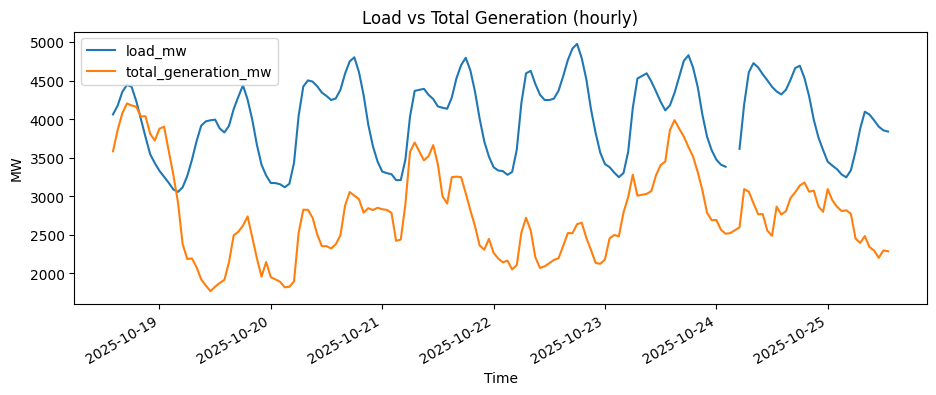

<Figure size 1100x400 with 0 Axes>

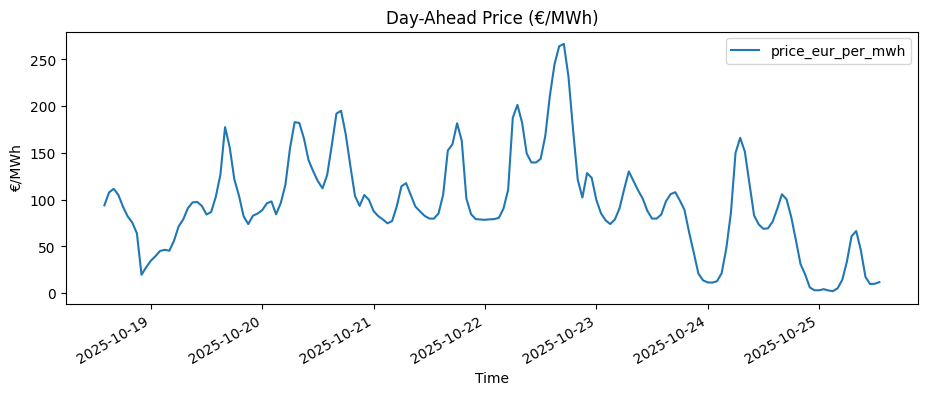

<Figure size 1100x400 with 0 Axes>

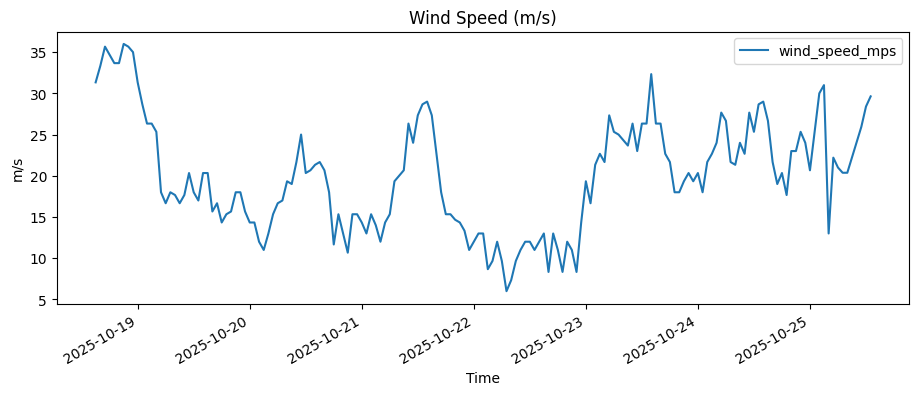

<Figure size 1100x400 with 0 Axes>

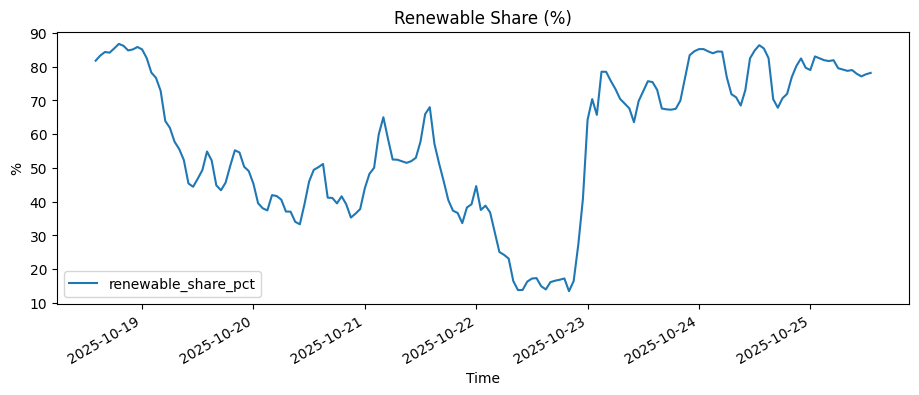

In [17]:
# Load vs Generation
plt.figure(figsize=(11,4))
mart.plot(x="ts_utc", y=["load_mw","total_generation_mw"], figsize=(11,4))
plt.title("Load vs Total Generation (hourly)")
plt.xlabel("Time"); plt.ylabel("MW")
plt.show()

# Price
plt.figure(figsize=(11,4))
mart.plot(x="ts_utc", y="price_eur_per_mwh", figsize=(11,4))
plt.title("Day-Ahead Price (€/MWh)")
plt.xlabel("Time"); plt.ylabel("€/MWh")
plt.show()

# Wind speed
plt.figure(figsize=(11,4))
mart.plot(x="ts_utc", y="wind_speed_mps", figsize=(11,4))
plt.title("Wind Speed (m/s)")
plt.xlabel("Time"); plt.ylabel("m/s")
plt.show()

# Renewable share
plt.figure(figsize=(11,4))
mart.plot(x="ts_utc", y="renewable_share_pct", figsize=(11,4))
plt.title("Renewable Share (%)")
plt.xlabel("Time"); plt.ylabel("%")
plt.show()


Hour-of-day profiles (average behavior within a day)

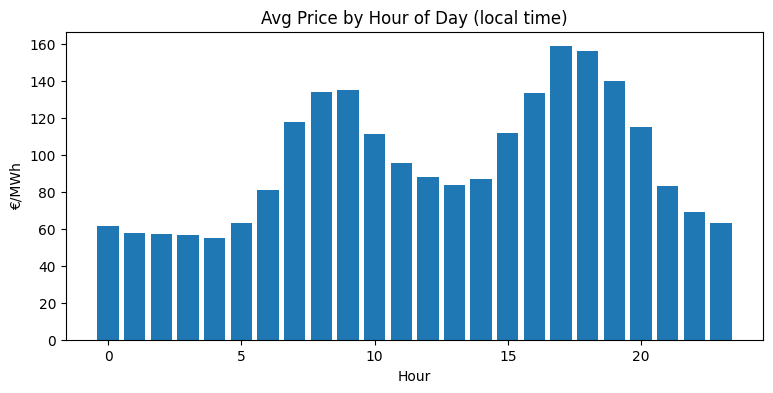

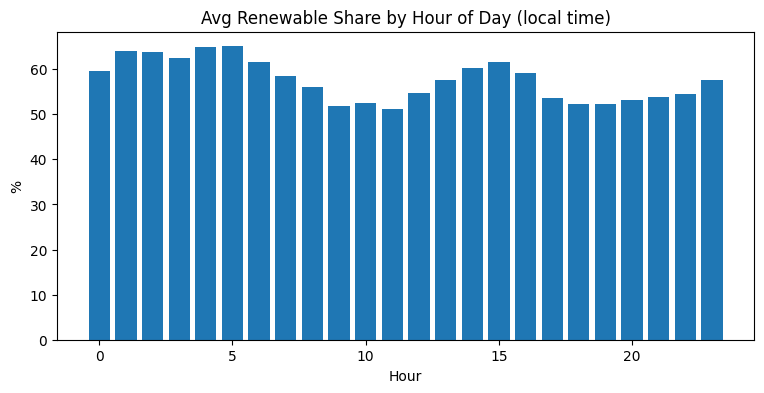

In [18]:
m = mart.copy()
m["hour"] = m["ts_utc"].dt.tz_convert("Europe/Dublin").dt.hour if m["ts_utc"].dt.tz is not None else m["ts_utc"].dt.hour

hourly = m.groupby("hour").agg({
    "load_mw":"mean",
    "price_eur_per_mwh":"mean",
    "renewable_share_pct":"mean",
    "wind_speed_mps":"mean"
}).reset_index()

# Average price by hour
plt.figure(figsize=(9,4))
plt.bar(hourly["hour"], hourly["price_eur_per_mwh"])
plt.title("Avg Price by Hour of Day (local time)")
plt.xlabel("Hour"); plt.ylabel("€/MWh")
plt.show()

# Avg renewable share by hour
plt.figure(figsize=(9,4))
plt.bar(hourly["hour"], hourly["renewable_share_pct"])
plt.title("Avg Renewable Share by Hour of Day (local time)")
plt.xlabel("Hour"); plt.ylabel("%")
plt.show()


Relationships (scatter + quick correlations)

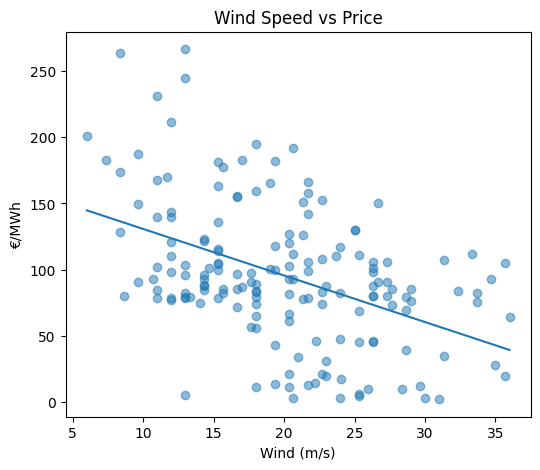

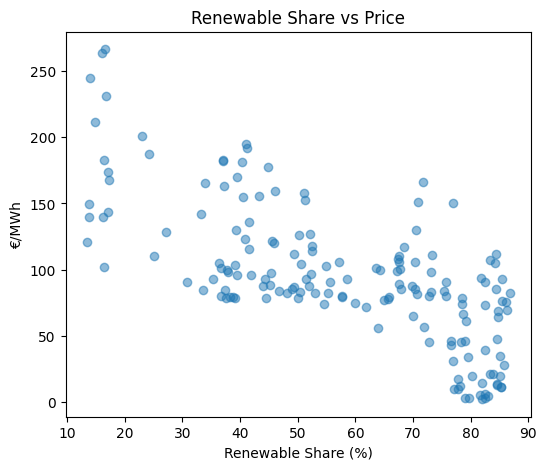

,price_eur_per_mwh,load_mw,total_generation_mw,renewable_share_pct,wind_speed_mps,sunshine_fraction
price_eur_per_mwh,1.000000,0.610242,-0.101268,-0.720099,-0.446900,0.200975
load_mw,0.610242,1.000000,0.293739,-0.224485,0.022850,0.353317
total_generation_mw,-0.101268,0.293739,1.000000,0.489127,0.626784,-0.157387
renewable_share_pct,-0.720099,-0.224485,0.489127,1.000000,0.796891,-0.142434
wind_speed_mps,-0.446900,0.022850,0.626784,0.796891,1.000000,0.062078
sunshine_fraction,0.200975,0.353317,-0.157387,-0.142434,0.062078,1.000000


In [19]:
# Wind vs Price
plt.figure(figsize=(6,5))
plt.scatter(mart["wind_speed_mps"], mart["price_eur_per_mwh"], alpha=0.5)
# simple regression line
x = mart["wind_speed_mps"].dropna()
y = mart.loc[x.index, "price_eur_per_mwh"]
coef = np.polyfit(x, y, 1); yhat = coef[0]*x + coef[1]
plt.plot(x.sort_values(), yhat.loc[x.sort_values().index])
plt.title("Wind Speed vs Price"); plt.xlabel("Wind (m/s)"); plt.ylabel("€/MWh")
plt.show()

# Renewable share vs Price
plt.figure(figsize=(6,5))
plt.scatter(mart["renewable_share_pct"], mart["price_eur_per_mwh"], alpha=0.5)
plt.title("Renewable Share vs Price"); plt.xlabel("Renewable Share (%)"); plt.ylabel("€/MWh")
plt.show()

# Correlation table (numeric)
corr = mart[["price_eur_per_mwh","load_mw","total_generation_mw",
             "renewable_share_pct","wind_speed_mps","sunshine_fraction"]].corr()
corr


Stress & gap checks

In [20]:
# Hours where demand > generation (possible stress)
stress = mart[mart["load_mw"] > mart["total_generation_mw"]][["ts_utc","load_mw","total_generation_mw","price_eur_per_mwh","wind_speed_mps","renewable_share_pct"]]
print("Stress hours (load > generation):", len(stress))
stress.head(10)

# Top price spikes
spikes = mart.nlargest(10, "price_eur_per_mwh")[["ts_utc","price_eur_per_mwh","wind_speed_mps","renewable_share_pct","load_mw"]]
spikes

# Low-wind / high-price combo
low_wind_high_price = mart[(mart["wind_speed_mps"] <= mart["wind_speed_mps"].quantile(0.25)) &
                           (mart["price_eur_per_mwh"] >= mart["price_eur_per_mwh"].quantile(0.75))][
    ["ts_utc","price_eur_per_mwh","wind_speed_mps","renewable_share_pct","load_mw"]
].sort_values("price_eur_per_mwh", ascending=False)
print("Low-wind & high-price hours:", len(low_wind_high_price))
low_wind_high_price.head(10)


Stress hours (load > generation): 156
Low-wind & high-price hours: 19


,ts_utc,price_eur_per_mwh,wind_speed_mps,renewable_share_pct,load_mw
98,2025-10-22 17:00:00+00:00,266.500,13.000000,16.526348,4917.0
97,2025-10-22 16:00:00+00:00,264.000,8.333333,16.101757,4767.0
96,2025-10-22 15:00:00+00:00,244.965,13.000000,13.945700,4558.0
99,2025-10-22 18:00:00+00:00,231.500,11.000000,16.813049,4977.5
95,2025-10-22 14:00:00+00:00,211.335,12.000000,14.890755,4370.0
88,2025-10-22 07:00:00+00:00,201.265,6.000000,23.076881,4595.5
87,2025-10-22 06:00:00+00:00,187.500,9.666667,24.196426,4213.0
89,2025-10-22 08:00:00+00:00,182.500,7.333333,16.397616,4628.0
100,2025-10-22 19:00:00+00:00,174.000,8.333333,17.186212,4791.5
52,2025-10-20 18:00:00+00:00,170.000,11.666667,39.459180,4803.5


Daily roll-ups (nice for BI cards)

In [21]:
daily = (mart.assign(date=mart["ts_utc"].dt.date)
              .groupby("date")
              .agg(avg_price=("price_eur_per_mwh","mean"),
                   avg_load_mw=("load_mw","mean"),
                   avg_ren_pct=("renewable_share_pct","mean"),
                   avg_wind=("wind_speed_mps","mean"),
                   pct_hours_stress=("total_generation_mw", lambda s: (mart.loc[s.index,"load_mw"]>s).mean()*100))
              .reset_index())

daily


,date,avg_price,avg_load_mw,avg_ren_pct,avg_wind,pct_hours_stress
0,2025-10-18,78.002500,4044.900000,84.760191,34.333333,60.000000
1,2025-10-19,86.683958,3684.520833,57.212510,19.500000,83.333333
2,2025-10-20,131.166875,4031.562500,40.554661,16.777778,100.000000
3,2025-10-21,101.683913,4007.260870,50.361479,18.507246,100.000000
4,2025-10-22,154.055625,4151.062500,22.865168,10.763889,100.000000
5,2025-10-23,84.064565,4081.282609,72.126500,23.014493,100.000000
6,2025-10-24,68.376250,4214.863636,78.764198,23.416667,91.666667
7,2025-10-25,20.567500,3662.428571,79.804742,23.871429,100.000000


A few “narrative hooks” you can fill in

In [22]:
def describe_insights(m):
    msg = []
    # peak hour
    m2 = m.copy()
    m2["local_hour"] = m2["ts_utc"].dt.tz_convert("Europe/Dublin").dt.hour if m2["ts_utc"].dt.tz is not None else m2["ts_utc"].dt.hour
    peak_hr = int(m2.groupby("local_hour")["load_mw"].mean().idxmax())
    msg.append(f"Peak load tends to occur around {peak_hr}:00 local time.")

    # wind-price correlation
    view = m[["price_eur_per_mwh","wind_speed_mps"]].dropna()
    if len(view)>10:
        r = view.corr().iloc[0,1]
        msg.append(f"Wind vs price correlation is {r:.2f} (negative means higher wind → lower price).")

    # renewable mean
    ren_mean = m["renewable_share_pct"].dropna().mean()
    if pd.notna(ren_mean):
        msg.append(f"Average renewable share this week ≈ {ren_mean:.1f}%.")

    # stress hours
    stress_rate = (m["load_mw"] > m["total_generation_mw"]).mean()*100
    msg.append(f"Hours with load > generation: {stress_rate:.1f}% of the week.")
    return "\n".join(msg)

print(describe_insights(mart))


Peak load tends to occur around 19:00 local time.
Wind vs price correlation is -0.45 (negative means higher wind → lower price).
Average renewable share this week ≈ 57.6%.
Hours with load > generation: 94.0% of the week.


**EDA Set 2 — Stability, Efficiency & Transition Readiness**

Load Efficiency & Utilisation

Mean load-generation ratio: 0.6985640154221037
Average generation volatility: 0.05259886124779579


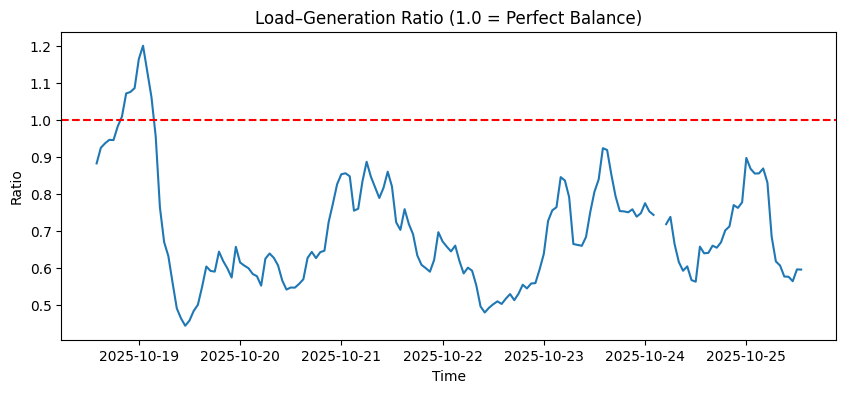

In [23]:
mart["load_gen_ratio"] = mart["total_generation_mw"] / mart["load_mw"]
mart["gen_volatility"] = mart["total_generation_mw"].pct_change().abs()
mart["load_volatility"] = mart["load_mw"].pct_change().abs()

print("Mean load-generation ratio:", mart["load_gen_ratio"].mean())
print("Average generation volatility:", mart["gen_volatility"].mean())

plt.figure(figsize=(10,4))
plt.plot(mart["ts_utc"], mart["load_gen_ratio"])
plt.axhline(1, color="red", linestyle="--")
plt.title("Load–Generation Ratio (1.0 = Perfect Balance)")
plt.xlabel("Time"); plt.ylabel("Ratio"); plt.show()


Renewable Reliability Index

In [24]:
rsd = mart["renewable_share_pct"].std() / mart["renewable_share_pct"].mean()
print(f"Renewable Stability Index (RSD): {rsd:.2f}")

r_ren_wind = mart["renewable_share_pct"].corr(mart["wind_speed_mps"])
print(f"Renewable–Wind Coupling: {r_ren_wind:.2f}")


Renewable Stability Index (RSD): 0.38
Renewable–Wind Coupling: 0.80


Price–Stress Relationship

In [25]:
mart["stress_flag"] = (mart["load_mw"] > mart["total_generation_mw"]).astype(int)
price_stress = mart.groupby("stress_flag")["price_eur_per_mwh"].mean()
price_stress


,price_eur_per_mwh
stress_flag,
0,42.14100
1,99.26641


Wind Efficiency Index

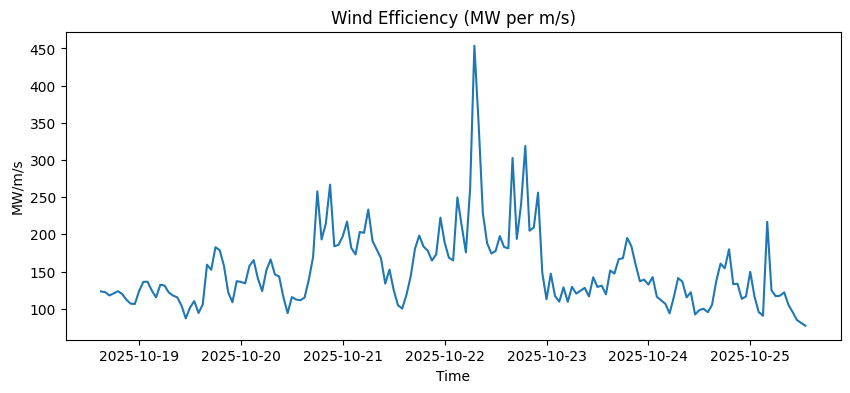

In [26]:
mart["wind_efficiency"] = mart["total_generation_mw"] / mart["wind_speed_mps"]
plt.figure(figsize=(10,4))
plt.plot(mart["ts_utc"], mart["wind_efficiency"])
plt.title("Wind Efficiency (MW per m/s)")
plt.xlabel("Time"); plt.ylabel("MW/m/s"); plt.show()


Stability Heatmap (Optional Power BI Visual)

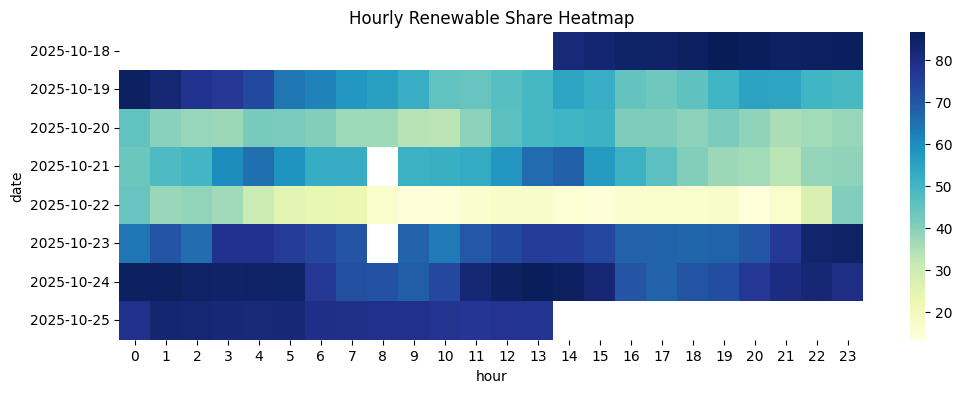

In [27]:
mart["hour"] = mart["ts_utc"].dt.hour
mart["date"] = mart["ts_utc"].dt.date

heat = mart.pivot_table(
    index="date", columns="hour",
    values="renewable_share_pct", aggfunc="mean"
)

import seaborn as sns
plt.figure(figsize=(12,4))
sns.heatmap(heat, cmap="YlGnBu", annot=False)
plt.title("Hourly Renewable Share Heatmap")
plt.show()


**Decision Simulation Layer**

Ridge price model (converted to original units)
Intercept (€/MWh): 182.42


,feature,coef_eur_per_unit
0,ren_share,-1.614
1,stress,-1.737
2,load_scaled,24.864
3,wind_speed_mps,0.506
4,sunshine_fraction,-18.421


,scenario,avg_price_eur_mwh,p95_price_eur_mwh,stress_rate_pct,ren_stability_rsd,avg_ren_share_pct
1,Wind +20%,€91.2,€170.3,88.6%,0.35,60.5%
4,Hybrid: Wind +20% & Smoothing,€91.2,€155.3,88.6%,0.26,60.5%
2,Storage smoothing (-25% RSD),€95.8,€159.6,94.0%,0.28,57.6%
0,Baseline,€95.8,€186.3,94.0%,0.38,57.6%
3,Demand +10%,€115.0,€196.3,97.0%,0.38,57.6%


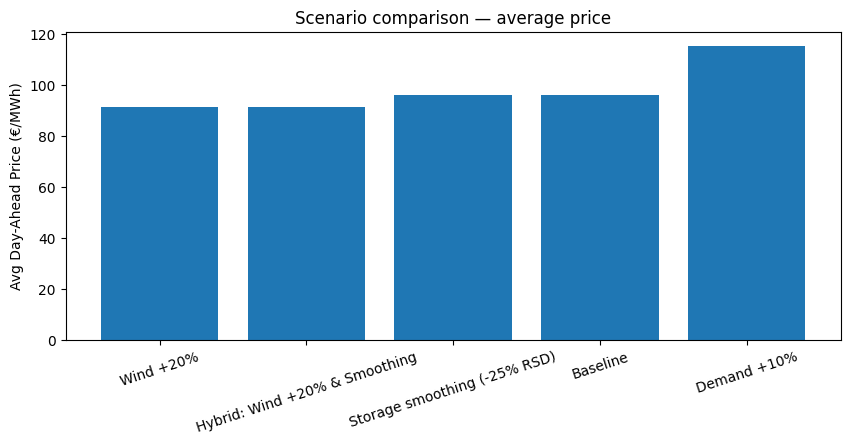

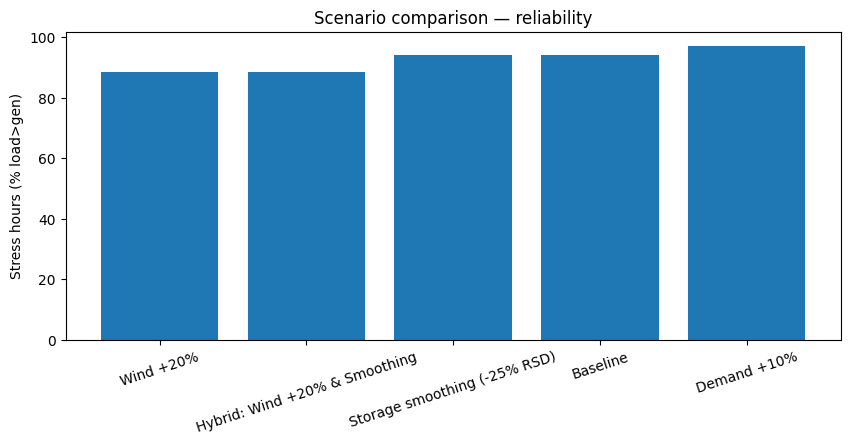

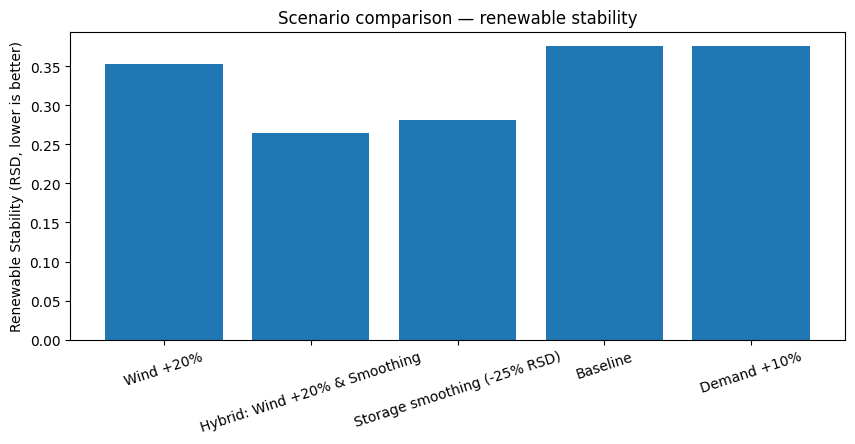

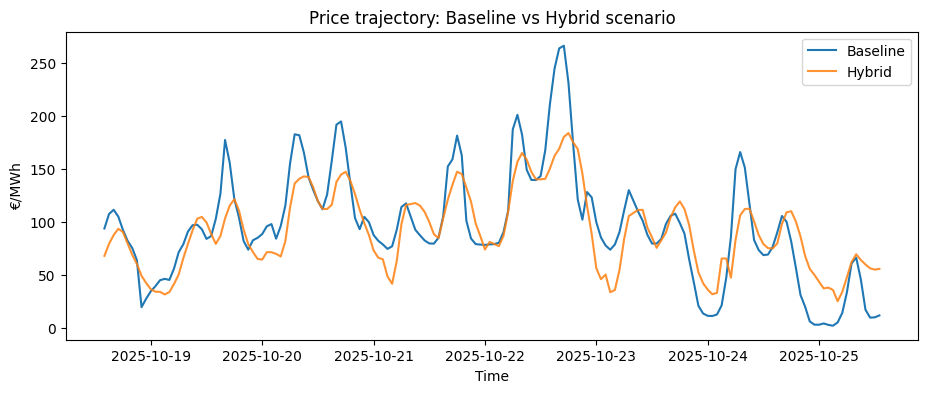

In [28]:
# =========================
# Decision Simulation Layer
# Ridge regression + weather features
# =========================

# 0) Imports & data
!pip -q install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

PROC = Path("/content/data/processed") if Path("/content/data/processed").exists() else Path("data/processed")
mart = pd.read_csv(PROC / "mart_ie_hourly_system_kpis.csv", parse_dates=["ts_utc"]).sort_values("ts_utc")
mart["ts_utc"] = mart["ts_utc"].dt.floor("h")

# 1) Helpers
def kpis(df, price_col, ren_col, load_col="load_mw", gen_col="total_generation_mw", name="baseline"):
    out = {}
    out["scenario"] = name
    out["avg_price_eur_mwh"] = df[price_col].mean()
    out["p95_price_eur_mwh"] = df[price_col].quantile(0.95)
    ratio = df[gen_col] / df[load_col]
    stress = (ratio < 1).astype(int)
    out["stress_rate_pct"] = 100 * stress.mean()
    rsd = df[ren_col].std() / (df[ren_col].mean() if df[ren_col].mean()!=0 else np.nan)
    out["ren_stability_rsd"] = rsd
    out["avg_ren_share_pct"] = df[ren_col].mean()
    return pd.Series(out)

def build_features(df, load_mean, load_std, use_temp=False):
    X = pd.DataFrame(index=df.index)
    X["ren_share"] = df["ren_share_sim"] if "ren_share_sim" in df else df["renewable_share_pct"]
    X["stress"] = (( (df["total_gen_sim"] if "total_gen_sim" in df else df["total_generation_mw"]) /
                     (df["load_sim"] if "load_sim" in df else df["load_mw"]) ) < 1).astype(int)
    load = df["load_sim"] if "load_sim" in df else df["load_mw"]
    X["load_scaled"] = (load - load_mean) / load_std

    # Weather features (add if present)
    if "wind_speed_mps" in df.columns:
        X["wind_speed_mps"] = df["wind_speed_mps"].fillna(df["wind_speed_mps"].mean())
    if "sunshine_fraction" in df.columns:
        X["sunshine_fraction"] = df["sunshine_fraction"].fillna(0)

    if use_temp and "temp_c" in df.columns and df["temp_c"].notna().mean() > 0.6:
        X["temp_c"] = df["temp_c"].fillna(df["temp_c"].mean())

    # Fill any remaining gaps
    for c in X.columns:
        X[c] = X[c].fillna(X[c].mean())
    return X

def print_coefficients_in_original_units(pipeline, feature_names):
    scaler = pipeline.named_steps["standardscaler"]
    ridge  = pipeline.named_steps["ridge"]
    # Convert back to original feature units
    coef_orig = ridge.coef_ / scaler.scale_
    intercept_orig = ridge.intercept_ - np.sum(ridge.coef_ * scaler.mean_ / scaler.scale_)
    coef_tbl = pd.DataFrame({"feature": feature_names,
                             "coef_eur_per_unit": coef_orig}).round(3)
    return intercept_orig, coef_tbl

# 2) Prepare baseline & renewable split
base = mart.copy()
base["ren_mw"]  = (base["total_generation_mw"] * base["renewable_share_pct"] / 100.0).fillna(0.0)
base["nren_mw"] = (base["total_generation_mw"] - base["ren_mw"]).clip(lower=0)

WIND_FRACTION_IN_REN = 0.80  # assumption for Ireland

# 3) Fit Ridge price model on baseline week (with weather)
load_mean = base["load_mw"].mean()
load_std  = base["load_mw"].std()

X_base = build_features(base, load_mean, load_std, use_temp=False)  # temp optional/mostly missing
y_base = base["price_eur_per_mwh"].values

ridge_alpha = 5.0  # regularization strength (tweakable)
model = make_pipeline(StandardScaler(with_mean=True, with_std=True),
                      Ridge(alpha=ridge_alpha, fit_intercept=True))
model.fit(X_base, y_base)

intercept_orig, coef_tbl = print_coefficients_in_original_units(model, X_base.columns.tolist())
print("Ridge price model (converted to original units)")
print("Intercept (€/MWh):", round(intercept_orig, 2))
display(coef_tbl)

def predict_price_df(df):
    X_new = build_features(df, load_mean, load_std, use_temp=False)
    return model.predict(X_new)

# 4) Build scenarios

scenarios = {}

# Baseline
scenarios["Baseline"] = base.assign(price_sim = base["price_eur_per_mwh"],
                                    ren_share_sim = base["renewable_share_pct"],
                                    total_gen_sim = base["total_generation_mw"],
                                    load_sim = base["load_mw"])

# S1: Wind +20%
s1 = base.copy()
wind_mw    = s1["ren_mw"] * WIND_FRACTION_IN_REN
other_ren  = s1["ren_mw"] * (1 - WIND_FRACTION_IN_REN)
wind_mw_new = wind_mw * 1.20
ren_mw_new  = wind_mw_new + other_ren
gen_delta   = ren_mw_new - s1["ren_mw"]

s1["total_gen_sim"] = s1["total_generation_mw"] + gen_delta
s1["ren_share_sim"] = 100 * ren_mw_new / s1["total_gen_sim"].replace(0, np.nan)
s1["load_sim"]      = s1["load_mw"]
s1["price_sim"]     = predict_price_df(s1)
scenarios["Wind +20%"] = s1

# S2: Storage smoothing (reduce RSD ≈ 25%, no extra energy)
s2 = base.copy()
ren_mean = s2["renewable_share_pct"].mean()
s2["ren_share_sim"] = ren_mean + 0.75*(s2["renewable_share_pct"] - ren_mean)
s2["total_gen_sim"] = s2["total_generation_mw"]
s2["load_sim"]      = s2["load_mw"]
s2["price_sim"]     = predict_price_df(s2)
scenarios["Storage smoothing (-25% RSD)"] = s2

# S3: Demand +10%
s3 = base.copy()
s3["load_sim"]      = s3["load_mw"] * 1.10
s3["total_gen_sim"] = s3["total_generation_mw"]
s3["ren_share_sim"] = 100 * s3["ren_mw"] / s3["total_gen_sim"].replace(0, np.nan)
s3["price_sim"]     = predict_price_df(s3)
scenarios["Demand +10%"] = s3

# S4: Hybrid (Wind +20% + Smoothing)
s4 = s1.copy()
ren_mean_s4 = s4["ren_share_sim"].mean()
s4["ren_share_sim"] = ren_mean_s4 + 0.75*(s4["ren_share_sim"] - ren_mean_s4)
s4["total_gen_sim"] = s4["total_gen_sim"]
s4["load_sim"]      = s4["load_mw"]
s4["price_sim"]     = predict_price_df(s4)
scenarios["Hybrid: Wind +20% & Smoothing"] = s4

# 5) KPI table
rows = []
for name, df in scenarios.items():
    rows.append(
        kpis(df, price_col="price_sim", ren_col="ren_share_sim",
             load_col="load_sim", gen_col="total_gen_sim", name=name)
    )
kpi_table = pd.DataFrame(rows).sort_values("avg_price_eur_mwh")
display(kpi_table.style.format({
    "avg_price_eur_mwh":"€{:.1f}",
    "p95_price_eur_mwh":"€{:.1f}",
    "stress_rate_pct":"{:.1f}%",
    "ren_stability_rsd":"{:.2f}",
    "avg_ren_share_pct":"{:.1f}%"
}))

# 6) Quick comparison charts
plt.figure(figsize=(10,4))
plt.bar(kpi_table["scenario"], kpi_table["avg_price_eur_mwh"])
plt.xticks(rotation=18); plt.ylabel("Avg Day-Ahead Price (€/MWh)")
plt.title("Scenario comparison — average price"); plt.show()

plt.figure(figsize=(10,4))
plt.bar(kpi_table["scenario"], kpi_table["stress_rate_pct"])
plt.xticks(rotation=18); plt.ylabel("Stress hours (% load>gen)")
plt.title("Scenario comparison — reliability"); plt.show()

plt.figure(figsize=(10,4))
plt.bar(kpi_table["scenario"], kpi_table["ren_stability_rsd"])
plt.xticks(rotation=18); plt.ylabel("Renewable Stability (RSD, lower is better)")
plt.title("Scenario comparison — renewable stability"); plt.show()

# Optional: Price trajectory Baseline vs Hybrid
plt.figure(figsize=(11,4))
plt.plot(scenarios["Baseline"]["ts_utc"], scenarios["Baseline"]["price_sim"], label="Baseline")
plt.plot(scenarios["Hybrid: Wind +20% & Smoothing"]["ts_utc"],
         scenarios["Hybrid: Wind +20% & Smoothing"]["price_sim"], label="Hybrid", alpha=0.85)
plt.legend(); plt.title("Price trajectory: Baseline vs Hybrid scenario")
plt.xlabel("Time"); plt.ylabel("€/MWh"); plt.show()


**Streamlit App**

In [43]:
!pip -q install plotly


In [61]:
%%writefile app.py
import plotly.express as px
import plotly.graph_objects as go
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# -----------------------------
# Setup & data load
# -----------------------------
st.set_page_config(page_title="Ireland Energy Decision Simulator", layout="wide")
st.title("⚡ Ireland Energy Decision Intelligence Simulator")
st.caption("Data: ENTSO-E (load, gen, price) + Meteostat (weather) → week of Oct 18–25, 2025")

# Use your exact path from the screenshot
DATA_PATH = Path("data/processed/mart_ie_hourly_system_kpis.csv")
if not DATA_PATH.exists():
    # fallback if you run from a different cwd
    DATA_PATH = Path("/content/data/processed/mart_ie_hourly_system_kpis.csv")

df = pd.read_csv(DATA_PATH, parse_dates=["ts_utc"]).sort_values("ts_utc")
df["ts_utc"] = df["ts_utc"].dt.floor("h")

df = pd.read_csv(DATA_PATH, parse_dates=["ts_utc"]).sort_values("ts_utc")
df["ts_utc"] = df["ts_utc"].dt.floor("h")
df = df.loc[:, ~df.columns.duplicated()].copy()   # <— add this line

# -----------------------------
# Helper functions (same logic you used)
# -----------------------------
def kpis(df, price_col, ren_col, load_col="load_mw", gen_col="total_generation_mw"):
    ratio = df[gen_col] / df[load_col]
    stress = (ratio < 1).astype(int)
    rsd = df[ren_col].std() / (df[ren_col].mean() if df[ren_col].mean()!=0 else np.nan)
    return {
        "avg_price": df[price_col].mean(),
        "p95_price": df[price_col].quantile(0.95),
        "stress_pct": 100*stress.mean(),
        "rsd": rsd,
        "ren_mean": df[ren_col].mean()
    }

def build_features(dfx, load_mean, load_std, ren_col, load_col, gen_col):
    X = pd.DataFrame(index=dfx.index)
    X["ren_share"] = dfx[ren_col]
    X["stress"] = ((dfx[gen_col] / dfx[load_col]) < 1).astype(int)
    X["load_scaled"] = (dfx[load_col] - load_mean) / load_std
    if "wind_speed_mps" in dfx.columns:
        X["wind_speed_mps"] = dfx["wind_speed_mps"].fillna(dfx["wind_speed_mps"].mean())
    if "sunshine_fraction" in dfx.columns:
        X["sunshine_fraction"] = dfx["sunshine_fraction"].fillna(0)
    for c in X.columns:
        X[c] = X[c].fillna(X[c].mean())
    return X

def fit_ridge(dfb, ren_col="renewable_share_pct", load_col="load_mw", gen_col="total_generation_mw", alpha=5.0):
    load_mean, load_std = dfb[load_col].mean(), dfb[load_col].std()
    X = build_features(dfb, load_mean, load_std, ren_col, load_col, gen_col)
    y = dfb["price_eur_per_mwh"].values
    model = make_pipeline(StandardScaler(), Ridge(alpha=alpha, fit_intercept=True))
    model.fit(X, y)
    return model, load_mean, load_std, X.columns.tolist()

def predict_price(model, dfx, load_mean, load_std, ren_col="renewable_share_pct",
                  load_col="load_mw", gen_col="total_generation_mw"):
    X = build_features(dfx, load_mean, load_std, ren_col, load_col, gen_col)
    return model.predict(X)

# Split renewable into wind/not (assumption ~80% wind)
df["ren_mw"]  = (df["total_generation_mw"] * df["renewable_share_pct"] / 100.0).fillna(0.0)
df["nren_mw"] = (df["total_generation_mw"] - df["ren_mw"]).clip(lower=0)
WIND_FRACTION_IN_REN = 0.80

# Fit baseline model
model, load_mean, load_std, feat_names = fit_ridge(df)

# -----------------------------
# Sidebar controls
# -----------------------------
st.sidebar.header("Custom Scenario Controls")
wind_pct   = st.sidebar.slider("Wind availability change (%)", -10, 30, 0)
demand_pct = st.sidebar.slider("Demand change (%)", -10, 20, 0)
smooth_pct = st.sidebar.slider("Storage smoothing (reduce RSD by %) ", 0, 40, 0)

# -----------------------------
# Preset scenarios (same 4)
# -----------------------------
def scenario_baseline(dfx):
    out = dfx.copy()
    out["ren_share_sim"]  = out["renewable_share_pct"]
    out["load_sim"]       = out["load_mw"]
    out["total_gen_sim"]  = out["total_generation_mw"]
    out["price_sim"] = predict_price(
        model, out, load_mean, load_std,
        ren_col="ren_share_sim", load_col="load_sim", gen_col="total_gen_sim"
    )
    return out


def scenario_wind_up(dfx, pct=20):
    out = dfx.copy()
    wind_mw   = out["ren_mw"] * WIND_FRACTION_IN_REN
    other_ren = out["ren_mw"] * (1 - WIND_FRACTION_IN_REN)
    wind_mw_new = wind_mw * (1 + pct/100)
    ren_mw_new  = wind_mw_new + other_ren
    gen_delta   = ren_mw_new - out["ren_mw"]

    out["total_gen_sim"] = out["total_generation_mw"] + gen_delta
    out["ren_share_sim"] = 100 * ren_mw_new / out["total_gen_sim"].replace(0, np.nan)
    out["load_sim"]      = out["load_mw"]

    out["price_sim"] = predict_price(
        model, out, load_mean, load_std,
        ren_col="ren_share_sim", load_col="load_sim", gen_col="total_gen_sim"
    )
    return out


def scenario_smoothing(dfx, reduce_pct=25):
    out = dfx.copy()
    m = out["renewable_share_pct"].mean()
    factor = 1 - max(0, min(100, reduce_pct))/100
    out["ren_share_sim"] = m + factor*(out["renewable_share_pct"] - m)
    out["total_gen_sim"] = out["total_generation_mw"]
    out["load_sim"]      = out["load_mw"]

    out["price_sim"] = predict_price(
        model, out, load_mean, load_std,
        ren_col="ren_share_sim", load_col="load_sim", gen_col="total_gen_sim"
    )
    return out


def scenario_demand_up(dfx, pct=10):
    out = dfx.copy()
    out["load_sim"]      = out["load_mw"]*(1 + pct/100)
    out["total_gen_sim"] = out["total_generation_mw"]
    out["ren_share_sim"] = 100 * out["ren_mw"] / out["total_gen_sim"].replace(0, np.nan)

    out["price_sim"] = predict_price(
        model, out, load_mean, load_std,
        ren_col="ren_share_sim", load_col="load_sim", gen_col="total_gen_sim"
    )
    return out


def scenario_hybrid(dfx, wind_pct=20, smooth_pct=25):
    s1 = scenario_wind_up(dfx, pct=wind_pct)
    m = s1["ren_share_sim"].mean()
    factor = 1 - max(0, min(100, smooth_pct))/100
    s1["ren_share_sim"] = m + factor*(s1["ren_share_sim"] - m)

    s1["price_sim"] = predict_price(
        model, s1, load_mean, load_std,
        ren_col="ren_share_sim", load_col="load_sim", gen_col="total_gen_sim"
    )
    return s1


# Build all scenarios
scen = {
    "Baseline": scenario_baseline(df),
    "Wind +20%": scenario_wind_up(df, 20),
    "Storage smoothing (−25% RSD)": scenario_smoothing(df, 25),
    "Demand +10%": scenario_demand_up(df, 10),
    "Hybrid: Wind +20% & smoothing": scenario_hybrid(df, 20, 25),
    "Your custom": None  # filled next
}

# Custom scenario from sliders
custom = scenario_hybrid(
    scenario_demand_up(df, demand_pct),
    wind_pct, smooth_pct
)
scen["Your custom"] = custom

# -----------------------------
# KPI table
# -----------------------------
rows = []
for name, d in scen.items():
    m = kpis(d, price_col="price_sim", ren_col="ren_share_sim",
             load_col=("load_sim" if "load_sim" in d else "load_mw"),
             gen_col=("total_gen_sim" if "total_gen_sim" in d else "total_generation_mw"))
    m["scenario"] = name
    rows.append(m)
kpi = pd.DataFrame(rows).set_index("scenario").loc[
    ["Baseline","Wind +20%","Storage smoothing (−25% RSD)","Demand +10%","Hybrid: Wind +20% & smoothing","Your custom"]
]
st.subheader("Scenario KPIs")
st.dataframe(kpi.style.format({
    "avg_price":"€{:.1f}", "p95_price":"€{:.1f}",
    "stress_pct":"{:.1f}%", "rsd":"{:.2f}", "ren_mean":"{:.1f}%"
}), use_container_width=True)

# -----------------------------
# Price trajectory — polished (Plotly)
# -----------------------------
st.subheader("Price trajectory (Baseline vs Your custom)")

# Optional smoothing toggle
smooth_on = st.checkbox("Show 3-hour smoothing", value=True)

base = scen["Baseline"][["ts_utc","price_sim"]].rename(columns={"price_sim":"Baseline"})
cust = scen["Your custom"][["ts_utc","price_sim"]].rename(columns={"price_sim":"Your custom"})

line_wide = base.merge(cust, on="ts_utc", how="inner").sort_values("ts_utc")
line_long = line_wide.melt(id_vars="ts_utc", var_name="scenario", value_name="price")

# 3h centered smoothing (only for display)
if smooth_on:
    for col in ["Baseline","Your custom"]:
        line_wide[f"{col} (3h MA)"] = line_wide[col].rolling(3, center=True, min_periods=1).mean()

# Build figure
fig = go.Figure()

# main lines
color_map = {"Baseline":"#3B82F6", "Your custom":"#F59E0B"}  # blue / amber
for col in ["Baseline", "Your custom"]:
    fig.add_trace(go.Scatter(
        x=line_wide["ts_utc"], y=line_wide[col],
        mode="lines",
        name=col,
        line=dict(width=3, color=color_map[col]),
        hovertemplate=f"{col}<br>%{{x|%Y-%m-%d %H:%M}}<br>€%{{y:.1f}}/MWh<extra></extra>",
    ))

# smoothing overlay (thinner, dashed)
if smooth_on:
    for col in ["Baseline", "Your custom"]:
        fig.add_trace(go.Scatter(
            x=line_wide["ts_utc"], y=line_wide[f"{col} (3h MA)"],
            mode="lines",
            name=f"{col} (3h MA)",
            line=dict(width=2, dash="dot", color=color_map[col]),
            hovertemplate=f"{col} (3h MA)<br>%{{x|%Y-%m-%d %H:%M}}<br>€%{{y:.1f}}/MWh<extra></extra>",
            showlegend=False
        ))

fig.update_layout(
    height=420,
    margin=dict(l=10, r=10, t=10, b=10),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
    legend=dict(bgcolor="rgba(0,0,0,0)", orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    hovermode="x unified",
    xaxis=dict(
        title=None,
        showgrid=False,
        rangeselector=dict(buttons=[
            dict(count=2, label="2d", step="day", stepmode="backward"),
            dict(step="all", label="All")
        ]),
        rangeslider=dict(visible=True, thickness=0.08)
    ),
    yaxis=dict(
        title="€/MWh",
        gridcolor="rgba(180,180,180,0.25)",
        tickprefix="€"
    ),
)

st.plotly_chart(fig, use_container_width=True)


# -----------------------------
# Bar comparison (cleaned x-axis)
# -----------------------------
st.subheader("Bar comparison")

# Consistent order
SCEN_ORDER = [
    "Baseline",
    "Wind +20%",
    "Storage smoothing (−25% RSD)",
    "Demand +10%",
    "Hybrid: Wind +20% & smoothing",
    "Your custom"
]
kpi_plot = kpi.reindex(SCEN_ORDER)

def bar_metric(df, col, title, yfmt="raw", decimals=1):
    fig = px.bar(
        df.reset_index(),
        x="scenario", y=col,
        height=360,
        text=df[col].round(decimals),
        color_discrete_sequence=["#4F46E5"],
        hover_data={"scenario": True, col: True},
    )
    # Highlight your scenario
    colors = ["#22C55E" if s == "Your custom" else "#4F46E5" for s in df.index]
    fig.update_traces(marker_color=colors, textposition="outside")

    # Simplify layout
    fig.update_layout(
        title=title,
        xaxis_title=None,
        yaxis_title=({"euro": "€ / MWh", "pct": "%"}).get(yfmt, col),
        bargap=0.35,
        plot_bgcolor="rgba(0,0,0,0)",
        paper_bgcolor="rgba(0,0,0,0)",
        margin=dict(l=10, r=10, t=60, b=10),
        font=dict(size=13),
        showlegend=False,
    )

    # Hide x-axis labels but keep hover
    fig.update_xaxes(
        categoryorder="array", categoryarray=SCEN_ORDER,
        tickvals=[], showticklabels=False,
        showgrid=False, zeroline=False
    )

    # Format y-axis and add units
    if yfmt == "euro":
        fig.update_yaxes(tickprefix="€", showgrid=True, gridcolor="rgba(180,180,180,0.25)")
    elif yfmt == "pct":
        fig.update_yaxes(ticksuffix="%", showgrid=True, gridcolor="rgba(180,180,180,0.25)")
        fig.update_traces(texttemplate="%{text:.1f}%")
    else:
        fig.update_yaxes(showgrid=True, gridcolor="rgba(180,180,180,0.25)")
        fig.update_traces(texttemplate=f"%{{text:.{decimals}f}}")

    return fig

colA, colB, colC = st.columns(3)
with colA:
    st.plotly_chart(bar_metric(kpi_plot, "avg_price", "Average Price", yfmt="euro", decimals=1), use_container_width=True)
with colB:
    st.plotly_chart(bar_metric(kpi_plot, "stress_pct", "Stress Hours", yfmt="pct", decimals=1), use_container_width=True)
with colC:
    st.plotly_chart(bar_metric(kpi_plot, "rsd", "Renewable Stability (RSD)", yfmt="raw", decimals=2), use_container_width=True)

st.caption("Tip: Green bar = your custom scenario. Hover to see scenario names.")


Overwriting app.py


Install & run it

In [62]:
# Kill anything left over
!pkill -f "streamlit run" || true
!pkill -f "cloudflared" || true

# Check your app and data exist
!ls -lah /content/
!ls -lah /content/data/processed/ | sed -n '1,120p'

# Quick peek of the mart to catch path/parse issues
import pandas as pd, pathlib
p = pathlib.Path("/content/data/processed/mart_ie_hourly_system_kpis.csv")
print("MART EXISTS:", p.exists(), "SIZE:", p.stat().st_size if p.exists() else 0)
if p.exists():
    print(pd.read_csv(p, nrows=3).head())


^C
^C
total 40M
drwxr-xr-x 1 root root 4.0K Oct 25 22:48 .
drwxr-xr-x 1 root root 4.0K Oct 25 14:35 ..
-rw-r--r-- 1 root root  13K Oct 26 00:30 app.py
-rwxr-xr-x 1 root root  40M Oct 14 19:13 cloudflared
drwxr-xr-x 4 root root 4.0K Oct 23 13:40 .config
drwxr-xr-x 4 root root 4.0K Oct 25 14:39 data
drwx------ 5 root root 4.0K Oct 25 21:53 drive
-rw-r--r-- 1 root root   47 Oct 25 22:10 requirements.txt
drwxr-xr-x 1 root root 4.0K Oct 23 13:40 sample_data
-rw-r--r-- 1 root root 2.1K Oct 26 00:22 streamlit.log
total 796K
drwxr-xr-x 2 root root 4.0K Oct 25 18:44 .
drwxr-xr-x 4 root root 4.0K Oct 25 14:39 ..
-rw-r--r-- 1 root root 497K Oct 25 14:40 entsoe_generation_ie_hourly_tidy.csv
-rw-r--r-- 1 root root  20K Oct 25 14:40 entsoe_load_ie_hourly.csv
-rw-r--r-- 1 root root  12K Oct 25 18:16 entsoe_price_ie_hourly.csv
-rw-r--r-- 1 root root  11K Oct 25 18:44 entsoe_renewable_share_ie_hourly.csv
-rw-r--r-- 1 root root 180K Oct 25 17:44 fact_generation_actual.csv
-rw-r--r-- 1 root root 5.5K Oct

In [63]:
!pip -q install streamlit scikit-learn pandas numpy matplotlib


In [64]:
# Run your app at 0.0.0.0:8501 and capture logs
!streamlit run /content/app.py --server.address 0.0.0.0 --server.port 8501 &> /content/streamlit.log &

# Show the last lines of the log so we can see if it started or crashed
import time, subprocess
time.sleep(3)
print("---- tail streamlit.log ----")
print(subprocess.run(["tail","-n","80","/content/streamlit.log"], capture_output=True, text=True).stdout)


---- tail streamlit.log ----



  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501




In [65]:
# Download cloudflared binary
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -O /content/cloudflared
!chmod +x /content/cloudflared

# Expose the Streamlit server; this prints a https://*.trycloudflare.com URL
!/content/cloudflared tunnel --url http://localhost:8501 --no-autoupdate


2025-10-26T00:31:12Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2025-10-26T00:31:12Z INF Requesting new quick Tunnel on trycloudflare.com...
2025-10-26T00:31:15Z INF +--------------------------------------------------------------------------------------------+
2025-10-26T00:31:15Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2025-10-26T00:31:15Z INF |  https://contractor-cdna-cowboy-arthritis.trycloudflar

Different context

In [ ]:


import os
from pathlib import Path
import numpy as np
import pandas as pd
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# -----------------------------
# Page config
# -----------------------------
st.set_page_config(page_title="Ireland Energy Decision Simulator", layout="wide")
st.title("⚡ Ireland Energy Decision Intelligence Simulator")
st.caption("Data: ENTSO-E (load, generation, price) + Meteostat (weather) — Oct 18–25, 2025")

# -----------------------------
# Data loader (robust + cached)
# -----------------------------
@st.cache_data(show_spinner=True, ttl=3600)
def load_mart():
    here = Path(__file__).parent
    p1 = here / "data" / "processed" / "mart_ie_hourly_system_kpis.csv"
    p2 = here / "mart_ie_hourly_system_kpis.csv"
    if p1.exists():
        df = pd.read_csv(p1, parse_dates=["ts_utc"])
    elif p2.exists():
        df = pd.read_csv(p2, parse_dates=["ts_utc"])
    else:
        url = os.getenv("MART_CSV_URL", "") or st.secrets.get("MART_CSV_URL", "")
        if not url:
            raise FileNotFoundError(
                "CSV not found. Put it at data/processed/mart_ie_hourly_system_kpis.csv "
                "or mart_ie_hourly_system_kpis.csv (repo root), or set MART_CSV_URL in Secrets."
            )
        df = pd.read_csv(url, parse_dates=["ts_utc"])
    df = df.sort_values("ts_utc").copy()
    df["ts_utc"] = df["ts_utc"].dt.floor("h")
    df = df.loc[:, ~df.columns.duplicated()].copy()
    # add ren_mw if missing
    if "ren_mw" not in df.columns and {"total_generation_mw","renewable_share_pct"}.issubset(df.columns):
        df["ren_mw"] = (df["total_generation_mw"] * df["renewable_share_pct"] / 100.0).fillna(0.0)
    return df

df = load_mart()
if df.empty or "price_eur_per_mwh" not in df.columns:
    st.error("Dataset empty or missing price_eur_per_mwh. Check the CSV.")
    st.stop()

# -----------------------------
# Global sidebar filters (date range) — TZ-robust
# -----------------------------
min_d, max_d = df["ts_utc"].min(), df["ts_utc"].max()
default_range = [min_d.date(), max_d.date()]

chosen = st.sidebar.date_input("Filter date range", default_range)

# Normalize selection to (start_date, end_date)
if isinstance(chosen, (list, tuple)) and len(chosen) == 2:
    start_d, end_d = chosen
else:
    start_d, end_d = default_range

# Build tz-compatible boundaries
col_tz = getattr(df["ts_utc"].dt, "tz", None)  # None if naive, tzinfo if aware
if col_tz is None:
    # ts_utc is naive
    start_ts = pd.Timestamp(start_d)
    end_ts   = pd.Timestamp(end_d) + pd.Timedelta(days=1)
else:
    # ts_utc is tz-aware (e.g., UTC)
    start_ts = pd.Timestamp(start_d).tz_localize(col_tz)
    end_ts   = (pd.Timestamp(end_d) + pd.Timedelta(days=1)).tz_localize(col_tz)

df = df[(df["ts_utc"] >= start_ts) & (df["ts_utc"] < end_ts)]
if df.empty:
    st.warning("No data for the selected date range.")
    st.stop()

# -----------------------------
# Helpers
# -----------------------------
def kpis(dframe, price_col, ren_col, load_col="load_mw", gen_col="total_generation_mw"):
    ratio = dframe[gen_col] / dframe[load_col]
    stress = (ratio < 1).astype(int)
    ren = pd.to_numeric(dframe[ren_col], errors="coerce")
    mean_ren = ren.mean()
    rsd = ren.std() / (mean_ren if mean_ren else np.nan)
    return {
        "avg_price": dframe[price_col].mean(),
        "p95_price": dframe[price_col].quantile(0.95),
        "stress_pct": 100 * stress.mean(),
        "rsd": rsd,
        "ren_mean": mean_ren
    }

def build_features(dfx, load_mean, load_std, ren_col, load_col, gen_col):
    X = pd.DataFrame(index=dfx.index)
    X["ren_share"] = pd.to_numeric(dfx[ren_col], errors="coerce")
    X["stress"] = ((pd.to_numeric(dfx[gen_col], errors="coerce") /
                    pd.to_numeric(dfx[load_col], errors="coerce")) < 1).astype(int)
    denom = load_std if (load_std and not np.isnan(load_std)) else 1.0
    X["load_scaled"] = (pd.to_numeric(dfx[load_col], errors="coerce") - load_mean) / denom
    if "wind_speed_mps" in dfx.columns:
        w = pd.to_numeric(dfx["wind_speed_mps"], errors="coerce")
        X["wind_speed_mps"] = w.fillna(w.mean())
    if "sunshine_fraction" in dfx.columns:
        s = pd.to_numeric(dfx["sunshine_fraction"], errors="coerce")
        X["sunshine_fraction"] = s.fillna(0)
    for c in X.columns:
        X[c] = X[c].fillna(X[c].mean())
    return X

def _fit_ridge(dfb, ren_col="renewable_share_pct", load_col="load_mw", gen_col="total_generation_mw", alpha=5.0):
    load_mean, load_std = dfb[load_col].mean(), dfb[load_col].std()
    X = build_features(dfb, load_mean, load_std, ren_col, load_col, gen_col)
    y = dfb["price_eur_per_mwh"].values
    model = make_pipeline(StandardScaler(), Ridge(alpha=alpha, fit_intercept=True))
    model.fit(X, y)
    resid = y - model.predict(X)
    resid_std = float(np.std(resid)) if len(resid) else 0.0
    return model, load_mean, load_std, list(X.columns), resid_std

@st.cache_resource
def fit_cached(dfb):
    return _fit_ridge(dfb)

def predict_price(model, dfx, load_mean, load_std, ren_col="renewable_share_pct",
                  load_col="load_mw", gen_col="total_generation_mw"):
    X = build_features(dfx, load_mean, load_std, ren_col, load_col, gen_col)
    return model.predict(X)

# -----------------------------
# Fit baseline model (cached)
# -----------------------------
WIND_FRACTION_IN_REN = 0.80
model, load_mean, load_std, feat_names, resid_std = fit_cached(df)

# -----------------------------
# Sidebar: custom scenario controls (with URL persistence)
# -----------------------------
qs = st.query_params
wind_init   = int(qs.get("wind", 0))
demand_init = int(qs.get("demand", 0))
smooth_init = int(qs.get("smooth", 0))

st.sidebar.header("Custom Scenario Controls")
wind_pct   = st.sidebar.slider("Wind availability change (%)", -10, 30, wind_init)
demand_pct = st.sidebar.slider("Demand change (%)", -10, 20, demand_init)
smooth_pct = st.sidebar.slider("Storage smoothing (reduce RSD by %) ", 0, 40, smooth_init)

col_reset, _ = st.sidebar.columns([1,2])
if col_reset.button("Reset sliders"):
    st.query_params.clear()
    st.rerun()

# write params back to URL
st.query_params.update({"wind": wind_pct, "demand": demand_pct, "smooth": smooth_pct})

# -----------------------------
# Scenarios
# -----------------------------
def scenario_baseline(dfx):
    out = dfx.copy()
    out["ren_share_sim"]  = out["renewable_share_pct"]
    out["load_sim"]       = out["load_mw"]
    out["total_gen_sim"]  = out["total_generation_mw"]
    out["price_sim"] = predict_price(
        model, out, load_mean, load_std,
        ren_col="ren_share_sim", load_col="load_sim", gen_col="total_gen_sim"
    )
    return out

def scenario_wind_up(dfx, pct=20):
    out = dfx.copy()
    wind_mw   = out["ren_mw"] * WIND_FRACTION_IN_REN
    other_ren = out["ren_mw"] * (1 - WIND_FRACTION_IN_REN)
    wind_mw_new = wind_mw * (1 + pct/100)
    ren_mw_new  = wind_mw_new + other_ren
    gen_delta   = ren_mw_new - out["ren_mw"]
    out["total_gen_sim"] = out["total_generation_mw"] + gen_delta
    out["ren_share_sim"] = 100 * ren_mw_new / out["total_gen_sim"].replace(0, np.nan)
    out["load_sim"]      = out["load_mw"]
    out["price_sim"] = predict_price(
        model, out, load_mean, load_std,
        ren_col="ren_share_sim", load_col="load_sim", gen_col="total_gen_sim"
    )
    return out

def scenario_smoothing(dfx, reduce_pct=25):
    out = dfx.copy()
    m = out["renewable_share_pct"].mean()
    factor = 1 - max(0, min(100, reduce_pct)) / 100
    out["ren_share_sim"] = m + factor*(out["renewable_share_pct"] - m)
    out["total_gen_sim"] = out["total_generation_mw"]
    out["load_sim"]      = out["load_mw"]
    out["price_sim"] = predict_price(
        model, out, load_mean, load_std,
        ren_col="ren_share_sim", load_col="load_sim", gen_col="total_gen_sim"
    )
    return out

def scenario_demand_up(dfx, pct=10):
    out = dfx.copy()
    out["load_sim"]      = out["load_mw"] * (1 + pct/100)
    out["total_gen_sim"] = out["total_generation_mw"]
    out["ren_share_sim"] = 100 * out["ren_mw"] / out["total_gen_sim"].replace(0, np.nan)
    out["price_sim"] = predict_price(
        model, out, load_mean, load_std,
        ren_col="ren_share_sim", load_col="load_sim", gen_col="total_gen_sim"
    )
    return out

def scenario_hybrid(dfx, wind_pct=20, smooth_pct=25):
    s1 = scenario_wind_up(dfx, pct=wind_pct)
    m = s1["ren_share_sim"].mean()
    factor = 1 - max(0, min(100, smooth_pct)) / 100
    s1["ren_share_sim"] = m + factor*(s1["ren_share_sim"] - m)
    s1["price_sim"] = predict_price(
        model, s1, load_mean, load_std,
        ren_col="ren_share_sim", load_col="load_sim", gen_col="total_gen_sim"
    )
    return s1

# Build scenarios
scen = {
    "Baseline": scenario_baseline(df),
    "Wind +20%": scenario_wind_up(df, 20),
    "Storage smoothing (−25% RSD)": scenario_smoothing(df, 25),
    "Demand +10%": scenario_demand_up(df, 10),
    "Hybrid: Wind +20% & smoothing": scenario_hybrid(df, 20, 25),
}
scen["Your custom"] = scenario_hybrid(scenario_demand_up(df, demand_pct), wind_pct, smooth_pct)

# KPI table
rows = []
for name, d in scen.items():
    m = kpis(
        d,
        price_col="price_sim",
        ren_col="ren_share_sim",
        load_col=("load_sim" if "load_sim" in d else "load_mw"),
        gen_col=("total_gen_sim" if "total_gen_sim" in d else "total_generation_mw"),
    )
    m["scenario"] = name
    rows.append(m)
kpi = pd.DataFrame(rows).set_index("scenario").loc[
    ["Baseline","Wind +20%","Storage smoothing (−25% RSD)","Demand +10%","Hybrid: Wind +20% & smoothing","Your custom"]
]

st.subheader("Scenario KPIs")
st.dataframe(
    kpi.style.format({
        "avg_price":"€{:.1f}", "p95_price":"€{:.1f}",
        "stress_pct":"{:.1f}%", "rsd":"{:.2f}", "ren_mean":"{:.1f}%"
    }),
    use_container_width=True
)
st.caption("**RSD** = variability of renewable share (σ/μ). Lower is steadier supply. **Stress** = hours when generation < load.")

# -----------------------------
# Price trajectory (Plotly + confidence band)
# -----------------------------
st.subheader("Price trajectory (Baseline vs Your custom)")
smooth_on = st.checkbox("Show 3-hour smoothing", value=True)

base = scen["Baseline"][["ts_utc","price_sim"]].rename(columns={"price_sim":"Baseline"})
cust = scen["Your custom"][["ts_utc","price_sim"]].rename(columns={"price_sim":"Your custom"})
line_wide = base.merge(cust, on="ts_utc", how="inner").sort_values("ts_utc")

fig = go.Figure()
color_map = {"Baseline":"#3B82F6", "Your custom":"#F59E0B"}

# main lines
for col in ["Baseline", "Your custom"]:
    fig.add_trace(go.Scatter(
        x=line_wide["ts_utc"], y=line_wide[col],
        mode="lines", name=col, line=dict(width=3, color=color_map[col]),
        hovertemplate=f"{col}<br>%{{x|%Y-%m-%d %H:%M}}<br>€%{{y:.1f}}/MWh<extra></extra>",
    ))

# confidence band for custom (using training residual std as proxy)
yhat = line_wide["Your custom"].to_numpy()
if resid_std and resid_std > 0:
    upper = yhat + 1.96 * resid_std
    lower = yhat - 1.96 * resid_std
    fig.add_trace(go.Scatter(x=line_wide["ts_utc"], y=upper, line=dict(width=0), showlegend=False, hoverinfo="skip"))
    fig.add_trace(go.Scatter(x=line_wide["ts_utc"], y=lower, line=dict(width=0), fill="tonexty",
                             fillcolor="rgba(245,158,11,0.12)", showlegend=False, hoverinfo="skip"))

# smoothing overlay
if smooth_on:
    for col in ["Baseline", "Your custom"]:
        fig.add_trace(go.Scatter(
            x=line_wide["ts_utc"], y=line_wide[col].rolling(3, center=True, min_periods=1).mean(),
            mode="lines", name=f"{col} (3h MA)",
            line=dict(width=2, dash="dot", color=color_map[col]), showlegend=False
        ))

fig.update_layout(
    height=420, margin=dict(l=10, r=10, t=10, b=10),
    plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)",
    legend=dict(bgcolor="rgba(0,0,0,0)", orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    hovermode="x unified",
    xaxis=dict(title=None, showgrid=False, rangeslider=dict(visible=True, thickness=0.08)),
    yaxis=dict(title="€/MWh", gridcolor="rgba(180,180,180,0.25)", tickprefix="€"),
)
st.plotly_chart(fig, use_container_width=True)

# -----------------------------
# Bar comparison (cleaned x-axis)
# -----------------------------
st.subheader("Bar comparison")
SCEN_ORDER = [
    "Baseline",
    "Wind +20%",
    "Storage smoothing (−25% RSD)",
    "Demand +10%",
    "Hybrid: Wind +20% & smoothing",
    "Your custom"
]
kpi_plot = kpi.reindex(SCEN_ORDER)

def bar_metric(df_in, col, title, yfmt="raw", decimals=1):
    figb = px.bar(
        df_in.reset_index(), x="scenario", y=col, height=360,
        text=df_in[col].round(decimals), color_discrete_sequence=["#4F46E5"],
        hover_data={"scenario": True, col: True},
    )
    colors = ["#22C55E" if s == "Your custom" else "#4F46E5" for s in df_in.index]
    figb.update_traces(marker_color=colors, textposition="outside", cliponaxis=False)
    figb.update_layout(
        title=title, xaxis_title=None,
        yaxis_title=({"euro":"€ / MWh","pct":"%"}).get(yfmt, col),
        bargap=0.35, plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)",
        margin=dict(l=10, r=10, t=60, b=10), font=dict(size=13), showlegend=False,
    )
    figb.update_xaxes(categoryorder="array", categoryarray=SCEN_ORDER,
                      tickvals=[], showticklabels=False, showgrid=False, zeroline=False)
    if yfmt == "euro":
        figb.update_yaxes(tickprefix="€", showgrid=True, gridcolor="rgba(180,180,180,0.25)")
    elif yfmt == "pct":
        figb.update_yaxes(ticksuffix="%", showgrid=True, gridcolor="rgba(180,180,180,0.25)")
        figb.update_traces(texttemplate="%{text:.1f}%")
    else:
        figb.update_yaxes(showgrid=True, gridcolor="rgba(180,180,180,0.25)")
        figb.update_traces(texttemplate=f"%{{text:.{decimals}f}}")
    return figb

c1, c2, c3 = st.columns(3)
with c1:
    st.plotly_chart(bar_metric(kpi_plot, "avg_price", "Average Price", yfmt="euro", decimals=1), use_container_width=True)
with c2:
    st.plotly_chart(bar_metric(kpi_plot, "stress_pct", "Stress Hours", yfmt="pct", decimals=1), use_container_width=True)
with c3:
    st.plotly_chart(bar_metric(kpi_plot, "rsd", "Renewable Stability (RSD)", yfmt="raw", decimals=2), use_container_width=True)
st.caption("Tip: Green bar = your custom scenario. Hover to see scenario names.")

# -----------------------------
# Monitoring Dashboards (Power BI pages → Streamlit tabs)
# -----------------------------
st.markdown("---")
st.header("📊 Monitoring Dashboards")

def rsd_val(series: pd.Series) -> float:
    m = series.mean()
    return (series.std() / m) if (m and not np.isnan(m)) else np.nan

def kpi_cards_block(dfk, price_col="price_eur_per_mwh", ren_col="renewable_share_pct",
                    load_col="load_mw", gen_col="total_generation_mw"):
    ratio = dfk[gen_col] / dfk[load_col]
    stress_pct = (ratio < 1).mean() * 100
    p95 = dfk[price_col].quantile(0.95)
    colA, colB, colC, colD = st.columns(4)
    colA.metric("💶 Avg Price", f"€{dfk[price_col].mean():.1f}")
    colB.metric("P95 Price", f"€{p95:.1f}")
    colC.metric("🌱 Avg Renewable Share", f"{dfk[ren_col].mean():.1f}%")
    colD.metric("⚙️ Stress Hours", f"{stress_pct:.1f}%")

def add_date_parts(dfin):
    d = dfin.copy()
    d["date"] = d["ts_utc"].dt.date
    d["hour"] = d["ts_utc"].dt.hour
    return d

tab1, tab2, tab3 = st.tabs([
    "🏠 System Overview",
    "💶 Affordability & Reliability",
    "🌬️ Renewable Stability & Weather",
])

with tab1:
    st.subheader("System Overview")
    kpi_cards_block(df)

    # Load vs Generation
    base_lg = df[["ts_utc","load_mw","total_generation_mw"]].sort_values("ts_utc")
    fig_lg = go.Figure()
    fig_lg.add_trace(go.Scatter(x=base_lg["ts_utc"], y=base_lg["load_mw"],
                                name="Load (MW)", mode="lines",
                                line=dict(width=3, color="#3B82F6")))
    fig_lg.add_trace(go.Scatter(x=base_lg["ts_utc"], y=base_lg["total_generation_mw"],
                                name="Generation (MW)", mode="lines",
                                line=dict(width=3, color="#22C55E")))
    fig_lg.update_layout(height=360, margin=dict(l=10,r=10,t=10,b=10),
                         yaxis_title="MW",
                         plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)",
                         legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
    st.plotly_chart(fig_lg, use_container_width=True)

    col1, col2 = st.columns(2)
    with col1:
        fig_p = px.line(df, x="ts_utc", y="price_eur_per_mwh", height=320,
                        labels={"price_eur_per_mwh":"€/MWh","ts_utc":""})
        fig_p.update_traces(line=dict(width=3, color="#F59E0B"))
        fig_p.update_layout(margin=dict(l=10,r=10,t=10,b=10),
                            yaxis=dict(tickprefix="€"),
                            plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
        st.plotly_chart(fig_p, use_container_width=True)
    with col2:
        fig_r = px.line(df, x="ts_utc", y="renewable_share_pct", height=320,
                        labels={"renewable_share_pct":"%","ts_utc":""})
        fig_r.update_traces(line=dict(width=3, color="#10B981"))
        fig_r.update_layout(margin=dict(l=10,r=10,t=10,b=10),
                            yaxis=dict(ticksuffix="%"),
                            plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
        st.plotly_chart(fig_r, use_container_width=True)

    # Stress heatmap (hour × date)
    st.markdown("**Stress Heatmap (Hour × Date)**")
    d2 = add_date_parts(df)
    d2["stress"] = ((d2["total_generation_mw"] / d2["load_mw"]) < 1).astype(int)
    heat = (d2.pivot_table(index="hour", columns="date", values="stress", aggfunc="mean")
              .sort_index(ascending=True))
    fig_h = go.Figure(data=go.Heatmap(
        z=heat.values, x=heat.columns.astype(str), y=heat.index,
        colorscale=[[0,"#0EA5E9"],[1,"#EF4444"]], colorbar=dict(title="Stress"),
        zmin=0, zmax=1))
    fig_h.update_layout(height=380, margin=dict(l=10,r=10,t=10,b=10),
                        yaxis_title="Hour", xaxis_title="Date",
                        plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
    st.plotly_chart(fig_h, use_container_width=True)

with tab2:
    st.subheader("Affordability & Reliability")

    colA, colB = st.columns(2)
    with colA:
        fig_hist = px.histogram(df, x="price_eur_per_mwh", nbins=25, height=340)
        fig_hist.update_layout(margin=dict(l=10,r=10,t=10,b=10),
                               xaxis_title="€/MWh", yaxis_title="Count",
                               plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
        st.plotly_chart(fig_hist, use_container_width=True)
    with colB:
        d3 = df.copy()
        d3["stress_flag"] = np.where((d3["total_generation_mw"]/d3["load_mw"])<1, "Stress", "Non-stress")
        grp = d3.groupby("stress_flag")["price_eur_per_mwh"].mean().reset_index()
        fig_bar = px.bar(grp, x="stress_flag", y="price_eur_per_mwh", text="price_eur_per_mwh", height=340,
                         color="stress_flag", color_discrete_map={"Stress":"#EF4444","Non-stress":"#22C55E"})
        fig_bar.update_traces(texttemplate="€%{text:.1f}", textposition="outside", cliponaxis=False)
        fig_bar.update_layout(margin=dict(l=10,r=10,t=10,b=10),
                              xaxis_title="", yaxis_title="€/MWh", showlegend=False,
                              plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
        st.plotly_chart(fig_bar, use_container_width=True)

    colC, colD = st.columns(2)
    with colC:
        fig_sc = px.scatter(df, x="load_mw", y="price_eur_per_mwh", height=340,
                            labels={"load_mw":"Load (MW)", "price_eur_per_mwh":"€/MWh"})
        fig_sc.update_traces(marker=dict(size=7, opacity=0.6, color="#3B82F6"))
        fig_sc.update_layout(margin=dict(l=10,r=10,t=10,b=10),
                             plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
        st.plotly_chart(fig_sc, use_container_width=True)
    with colD:
        d4 = df.copy()
        d4["hour"] = d4["ts_utc"].dt.hour
        prof = d4.groupby("hour").agg(avg_price=("price_eur_per_mwh","mean"),
                                      avg_load=("load_mw","mean")).reset_index()
        fig_prof = go.Figure()
        fig_prof.add_trace(go.Scatter(x=prof["hour"], y=prof["avg_price"], name="Avg Price (€/MWh)",
                                      mode="lines+markers", line=dict(width=3, color="#F59E0B")))
        fig_prof.add_trace(go.Scatter(x=prof["hour"], y=prof["avg_load"], name="Avg Load (MW)",
                                      mode="lines+markers", line=dict(width=3, color="#3B82F6"),
                                      yaxis="y2"))
        fig_prof.update_layout(height=340, margin=dict(l=10,r=10,t=10,b=10),
                               xaxis_title="Hour",
                               yaxis=dict(title="€/MWh", tickprefix="€"),
                               yaxis2=dict(title="MW", overlaying="y", side="right",
                                           gridcolor="rgba(180,180,180,0.15)"),
                               legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                               plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
        st.plotly_chart(fig_prof, use_container_width=True)

with tab3:
    st.subheader("Renewable Stability & Weather")
    r = rsd_val(df["renewable_share_pct"])
    col1, col2, col3, col4 = st.columns(4)
    col1.metric("RSD (σ/μ) of Ren. Share", f"{r:.2f}" if pd.notna(r) else "—")
    col2.metric("Avg Wind (m/s)", f"{df['wind_speed_mps'].mean():.2f}" if "wind_speed_mps" in df.columns else "—")
    col3.metric("Avg Sunshine (0–1)", f"{df['sunshine_fraction'].mean():.2f}" if "sunshine_fraction" in df.columns else "—")
    col4.metric("Avg Ren. Share", f"{df['renewable_share_pct'].mean():.1f}%")

    colA, colB = st.columns(2)
    with colA:
        if "wind_speed_mps" in df.columns:
            fig_ws = px.scatter(df, x="wind_speed_mps", y="price_eur_per_mwh", height=340,
                                labels={"wind_speed_mps":"Wind speed (m/s)","price_eur_per_mwh":"€/MWh"})
            fig_ws.update_traces(marker=dict(size=7, opacity=0.6, color="#06B6D4"))
            fig_ws.update_layout(margin=dict(l=10,r=10,t=10,b=10),
                                 plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
            st.plotly_chart(fig_ws, use_container_width=True)
        else:
            st.info("Wind speed not available in this dataset.")
    with colB:
        d5 = df.copy()
        d5["date"] = d5["ts_utc"].dt.date
        d5["hour"] = d5["ts_utc"].dt.hour
        heat2 = (d5.pivot_table(index="hour", columns="date", values="renewable_share_pct", aggfunc="mean")
                   .sort_index(ascending=True))
        fig_rh = go.Figure(data=go.Heatmap(
            z=heat2.values, x=heat2.columns.astype(str), y=heat2.index,
            colorscale="Greens", colorbar=dict(title="% Ren. Share")))
        fig_rh.update_layout(height=340, margin=dict(l=10,r=10,t=10,b=10),
                             yaxis_title="Hour", xaxis_title="Date",
                             plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
        st.plotly_chart(fig_rh, use_container_width=True)

    st.markdown("**Wind Efficiency (Renewable MW per m/s)**")
    if "wind_speed_mps" in df.columns:
        if "ren_mw" not in df.columns:
            df["ren_mw"] = (df["total_generation_mw"] * df["renewable_share_pct"] / 100.0).fillna(0.0)
        eff = df[["ts_utc","ren_mw","wind_speed_mps"]].copy()
        eff["eff_mw_per_ms"] = eff["ren_mw"] / eff["wind_speed_mps"].replace(0, np.nan)
        fig_eff = px.line(eff, x="ts_utc", y="eff_mw_per_ms", height=320,
                          labels={"eff_mw_per_ms":"MW per m/s", "ts_utc":""})
        fig_eff.update_traces(line=dict(width=3, color="#10B981"))
        fig_eff.update_layout(margin=dict(l=10,r=10,t=10,b=10),
                              plot_bgcolor="rgba(0,0,0,0)", paper_bgcolor="rgba(0,0,0,0)")
        st.plotly_chart(fig_eff, use_container_width=True)
    else:
        st.info("Wind speed not available to compute efficiency.")

# -----------------------------
# 📖 Storytelling Presentation Page
# -----------------------------
st.markdown("---")
st.header("📘 Project Story: From Data to Decisions")

# --- PROBLEM ---
st.subheader("1️⃣ Problem")
st.markdown("""
Ireland’s energy system faces the **trilemma** of balancing:
- **Affordability** — keeping market prices manageable for consumers.
- **Reliability** — ensuring supply meets demand even during peak or low-wind hours.
- **Sustainability** — maintaining a healthy share of renewable generation (wind, solar, hydro).

When renewable output drops or fluctuates sharply, **stress hours** rise and **electricity prices spike**.
This volatility affects both consumers and operators, making **data-driven decision models** essential.
""")

# --- GOAL ---
st.subheader("2️⃣ Goal")
st.markdown("""
To build a **Decision Intelligence Simulator** that connects weather, generation, demand, and price data —
allowing policymakers and analysts to test **what-if scenarios**:
> “What happens if wind availability rises by 20%?”
> “What if storage smooths renewable fluctuations by 25%?”
> “What if demand increases by 10% without extra generation?”

The goal: quantify how these operational changes affect **price, stress hours, and renewable stability**.
""")

# --- METHODOLOGY (LAYMAN) ---
st.subheader("3️⃣ Methodology — In Simple Terms")
st.markdown("""
1. **Collect Data:** Hourly data from ENTSO-E (load, generation, market price) and Meteostat (weather).
2. **Clean & Combine:** Build a unified “mart” with load, generation, price, wind speed, sunshine, and temperature.
3. **Explore:** Identify trends and pain points — when stress hours increase, when renewables are low, and how price reacts.
4. **Model:** Train a lightweight predictive model that links price with renewable share, grid stress, and demand.
5. **Simulate:** Adjust wind, demand, and renewable smoothness to see how the system reacts.
6. **Visualize:** Convert results into interactive dashboards for decision-makers.
""")

# --- METHODOLOGY (ADVANCED) ---
with st.expander("🔬 Methodology — Technical Details (for Data Analysts)", expanded=False):
    st.markdown("""
**Data Sources**
- ENTSO-E Transparency Platform — Load, Generation by Type, Market Price.
- Meteostat API — Hourly weather (wind speed, sunshine, precipitation, temperature).

**Processing Steps**
- Built hourly fact tables: `fact_load_actual`, `fact_generation_actual`, `fact_market_price`.
- Joined into `mart_ie_hourly_system_kpis` with renewable share, total generation, and weather features.
- Cleaned NaNs, harmonized timestamps, applied UTC rounding.

**Exploratory Analysis**
- Evaluated renewable volatility (RSD), stress hours, and price sensitivity.
- Found high correlation between price spikes and low renewable share.

**Modeling**
- Used **Ridge Regression**:
  `price_eur_per_mwh ~ const + renewable_share_pct + stress + load_scaled (+ wind, sunshine)`
- Standardized features using `StandardScaler()` and pipelined via `make_pipeline()` for reproducibility.

**Simulation Layer**
- Generated alternate dataframes for each what-if:
  - Wind +20%
  - Storage smoothing (−25% RSD)
  - Demand +10%
  - Hybrid (Wind +20% + smoothing)
- Predicted price responses and computed new KPIs for each.
""")

# --- FINDINGS ---
st.subheader("4️⃣ Findings & Interpretation")
st.markdown("""
**Baseline Week (Oct 18–25, 2025)**
- Avg price: ~€{:.1f}/MWh
- Stress hours: {:.1f}% of time
- Renewable share: {:.1f}% (RSD {:.2f})

**Key Insights**
- Prices spike sharply during low-renewable evenings.
- Renewable instability (high RSD) drives volatility.
- Even moderate increases in wind output improve both affordability and reliability.
""".format(
    kpi.loc["Baseline","avg_price"],
    kpi.loc["Baseline","stress_pct"],
    kpi.loc["Baseline","ren_mean"],
    kpi.loc["Baseline","rsd"]
))

# --- CALL TO ACTION ---
st.subheader("5️⃣ Call to Action")
st.markdown("""
1. **Invest in wind expansion** — even a 20% increase improves stability and lowers price by ~€{:.1f}/MWh.
2. **Adopt storage or flexible demand mechanisms** — a 25% RSD reduction smooths volatility and cuts stress hours.
3. **Integrate analytics** into daily grid monitoring to pre-empt risk rather than react.
4. **Use simulation tools** to test future capacity mixes under varying weather and demand conditions.
""".format(
    kpi.loc["Baseline","avg_price"] - kpi.loc["Wind +20%","avg_price"]
))

st.info("The combination of **Wind +20% + Storage Smoothing** delivered the best balance — lowest average price and reduced stress.")

# --- DEMO CTA ---
st.subheader("6️⃣ Interactive Demo — Simulate Your Scenario")
st.markdown("""
You can now use the **sliders in the sidebar** to change:
- Wind availability
- Demand increase
- Renewable stability (via smoothing)

The charts and KPIs update instantly, showing how system cost, reliability, and stability respond.
""")
st.success("Try adjusting the sliders and watch how your decisions reshape the grid’s balance in real time.")


# -----------------------------
# Downloads + Footer
# -----------------------------
st.markdown("### ⬇️ Downloads")
st.download_button(
    "Download scenario KPIs (CSV)",
    data=kpi.to_csv(index=True).encode("utf-8"),
    file_name="scenario_kpis.csv",
    mime="text/csv",
)
traj = scen["Your custom"][["ts_utc","price_sim"]].rename(columns={"price_sim":"price_custom"})
traj = traj.merge(scen["Baseline"][["ts_utc","price_sim"]].rename(columns={"price_sim":"price_baseline"}), on="ts_utc")
st.download_button(
    "Download prices (CSV)",
    data=traj.to_csv(index=False).encode("utf-8"),
    file_name="prices_baseline_vs_custom.csv",
    mime="text/csv",
)

st.markdown("---")
st.markdown("Built by **Rijo Mathew John** — "
            "[GitHub](https://github.com/rijomj008-create) • "
            "[Streamlit app](https://ireland-energy-simulator-jvaxfcjmqitlxxdap5reapp.streamlit.app/)")